In [1]:
import pandas as pd
from plotnine import *

pd.set_option('display.max_columns', None)

df_collisions = pd.read_csv('collisions_1979_2022.csv', usecols = ['accident_index', 
                                                                   'accident_year', 
                                                                   'accident_severity',
                                                                   'number_of_casualties',
                                                                   'date','day_of_week','time', 
                                                                   'first_road_class',
                                                                   'speed_limit',
                                                                   'light_conditions',
                                                                   'weather_conditions',
                                                                   'road_surface_conditions',
                                                                   'special_conditions_at_site',
                                                                   'carriageway_hazards',
                                                                   'urban_or_rural_area'], low_memory = False)

In [2]:
### Drop -1 values
#df_collisions = df_collisions[df_collisions != -1].dropna()

In [3]:
df_collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809915 entries, 0 to 8809914
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   accident_index              object 
 1   accident_year               int64  
 2   accident_severity           int64  
 3   number_of_casualties        int64  
 4   date                        object 
 5   day_of_week                 int64  
 6   time                        object 
 7   first_road_class            int64  
 8   speed_limit                 float64
 9   light_conditions            int64  
 10  weather_conditions          int64  
 11  road_surface_conditions     int64  
 12  special_conditions_at_site  int64  
 13  carriageway_hazards         int64  
 14  urban_or_rural_area         int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 1008.2+ MB


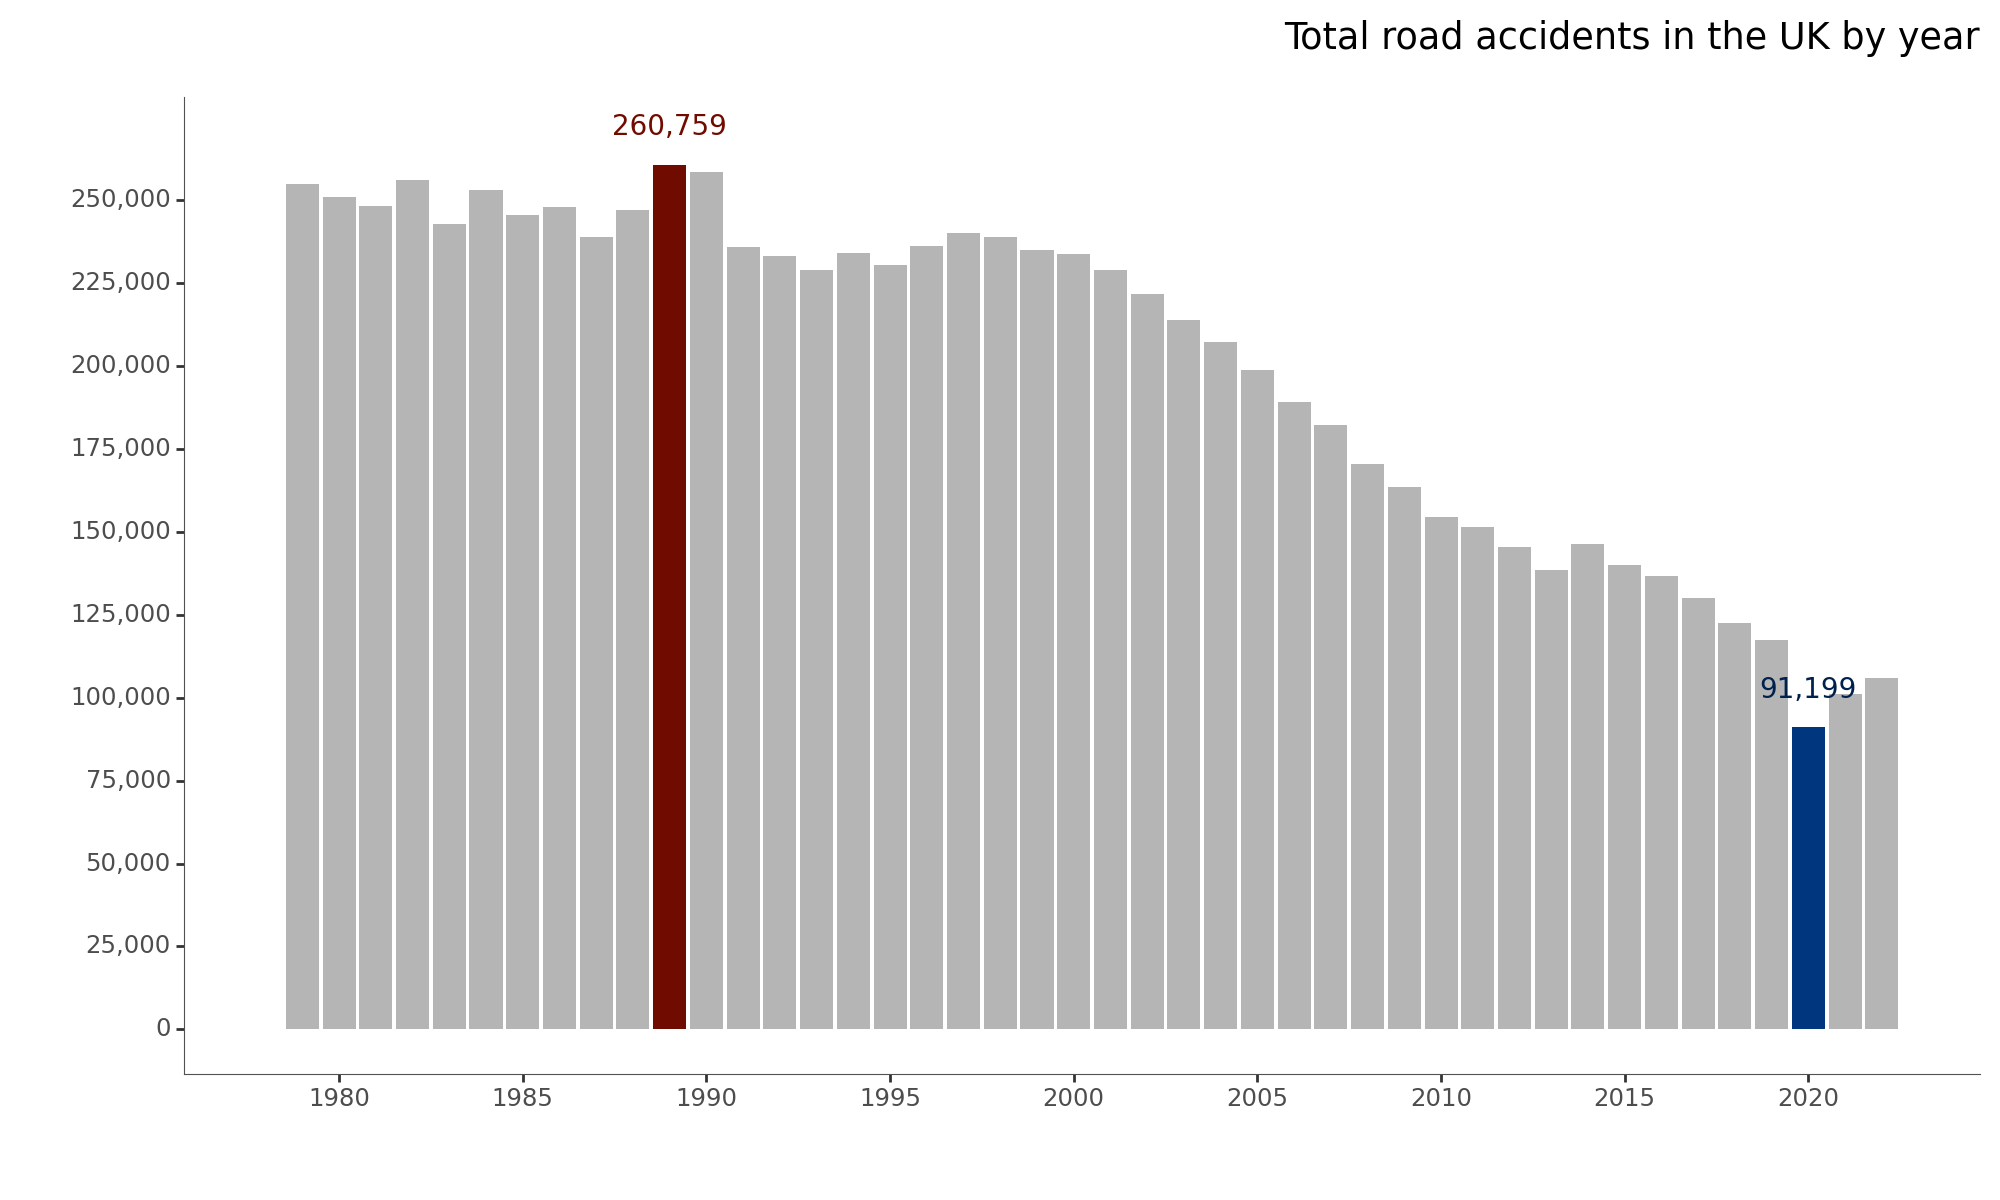

In [4]:
### Total accidents per year
total_acc_by_year = df_collisions.groupby('accident_year')['accident_index'].count()

df_total_acc_by_year = pd.DataFrame({'year': total_acc_by_year.index, 'accidents_count': total_acc_by_year.values})

plot = (
    ggplot(df_total_acc_by_year, aes(x='year', y='accidents_count')) +
    geom_bar(stat='identity', fill='#b5b5b5') +
    geom_bar(df_total_acc_by_year[df_total_acc_by_year['year'] == 2020], aes(x='year', y='accidents_count'), fill='#00367d', stat='identity') +
    geom_text(df_total_acc_by_year[df_total_acc_by_year['year'] == 2020], aes(x='year', y='accidents_count', label='accidents_count'), color='#00214d', va='bottom', size=10, nudge_y=7000, format_string="{:,}") +
    geom_bar(df_total_acc_by_year[df_total_acc_by_year['year'] == 1989], aes(x='year', y='accidents_count'), fill='#700b00', stat='identity') + 
    geom_text(df_total_acc_by_year[df_total_acc_by_year['year'] == 1989], aes(x='year', y='accidents_count', label='accidents_count'), color='#700b00', va='bottom', size=10, nudge_y=7000, format_string="{:,}") +
    labs(title='Total road accidents in the UK by year') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),  
        plot_title=element_text(hjust=1), 
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(1980, int(df_total_acc_by_year['year'].max()) + 1, 5),
                       labels=range(1980, int(df_total_acc_by_year['year'].max()) + 1, 5),
                       limits=(1978, None)) +  
    scale_y_continuous(breaks=range(0, int(df_total_acc_by_year['accidents_count'].max()) + 1, 25000),
                       labels=lambda x: ["{:,}".format(label) for label in x])  
)

print(plot)

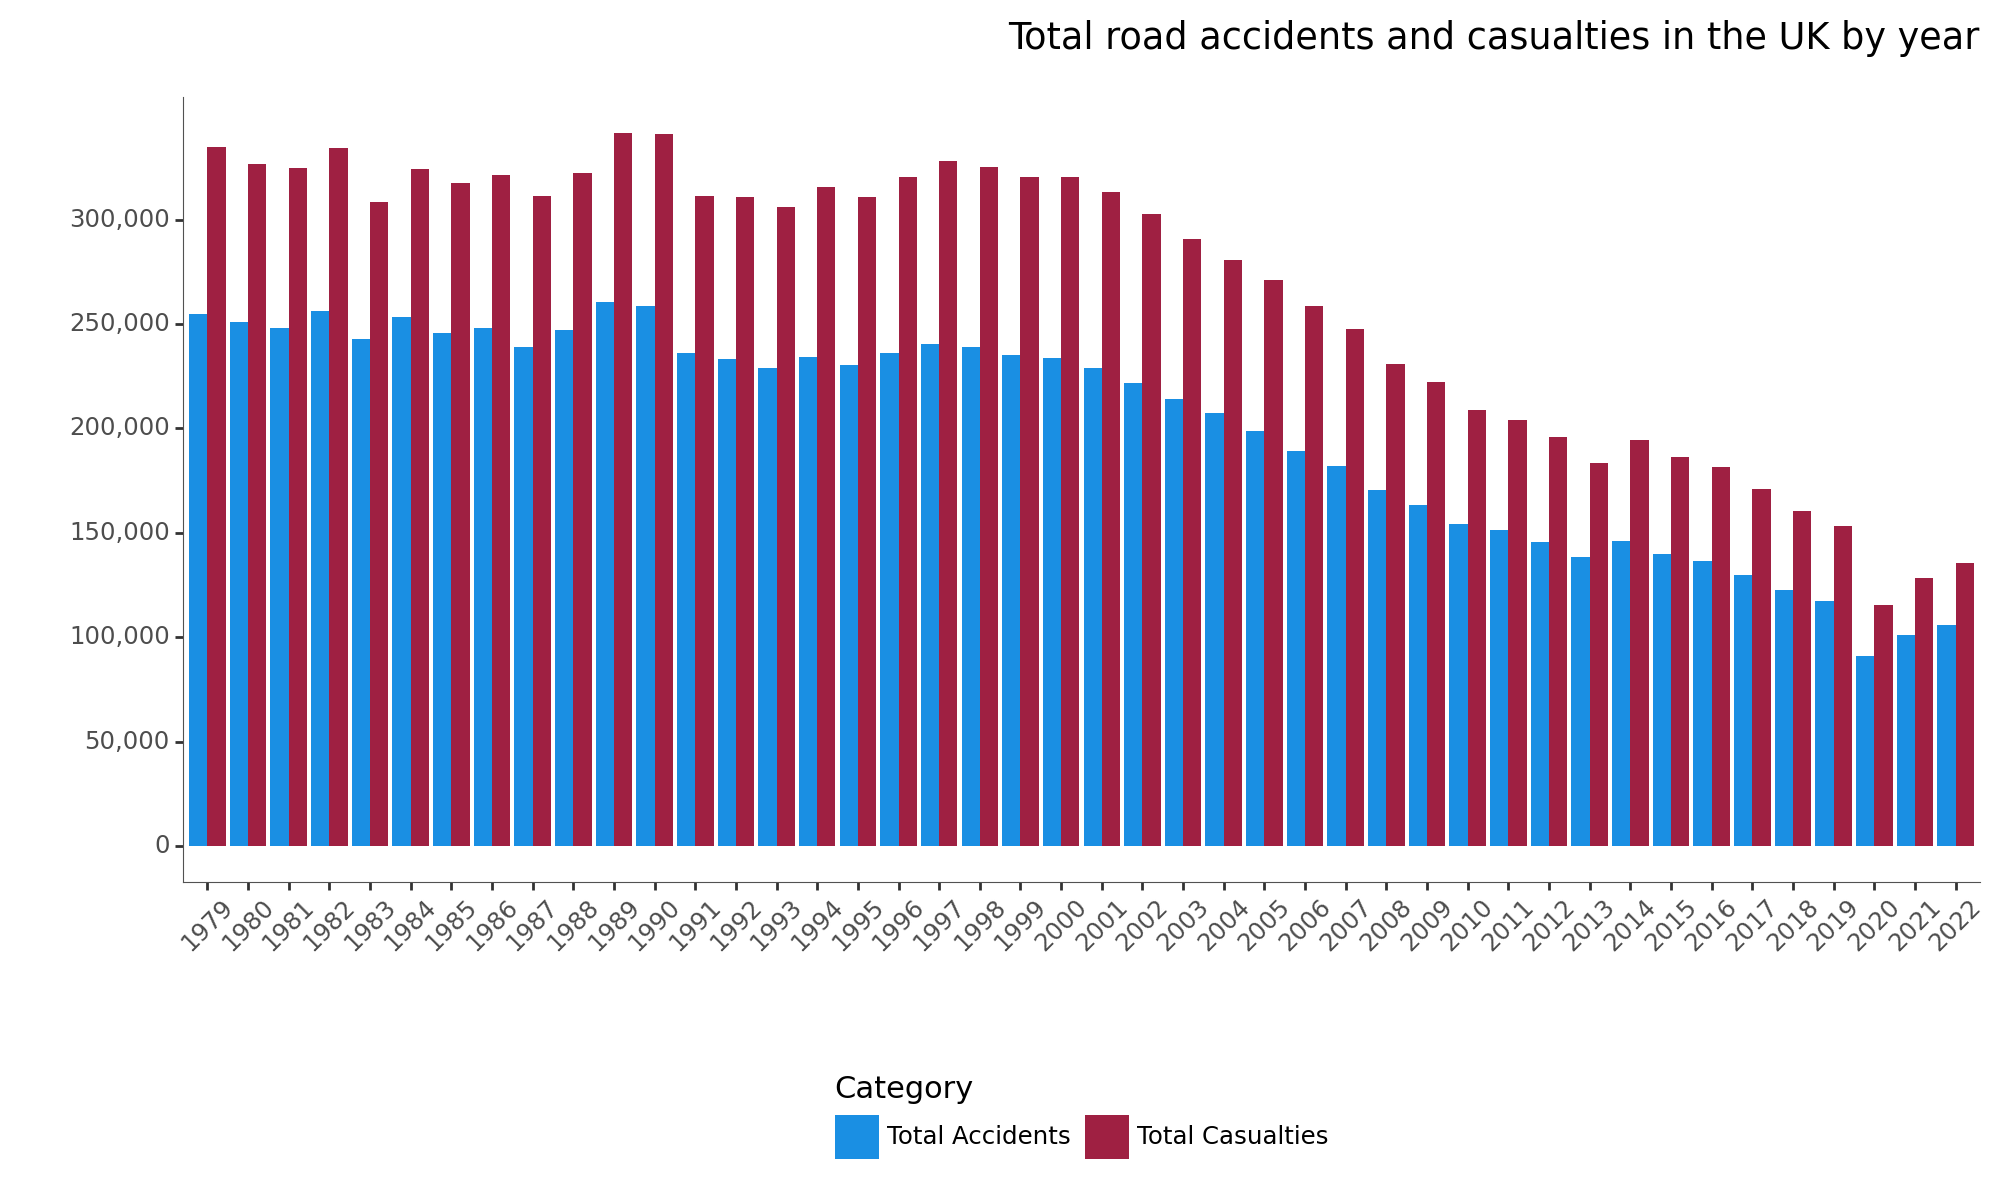

In [5]:
### Total accidents and casulties per year
total_cas_by_year = df_collisions.groupby('accident_year')['number_of_casualties'].sum()
total_acc_by_year = df_collisions.groupby('accident_year').size()

df_total_acc_cas_by_year = pd.DataFrame({'total_accidents': total_acc_by_year,'total_casualties': total_cas_by_year}).reset_index()

plot = (
    ggplot(pd.melt(df_total_acc_cas_by_year, id_vars='accident_year', var_name='variable', value_name='count'),
           aes(x='factor(accident_year)', y='count', fill='variable')) +
    geom_bar(position='dodge', stat='identity', color='white', size=0) + 
    labs(title='Total road accidents and casualties in the UK by year') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=0.5),
        plot_title=element_text(hjust=1),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',  
        figure_size=(10, 6)  
    ) +
    scale_y_continuous(breaks=range(0, int(df_total_acc_cas_by_year[['total_accidents', 'total_casualties']].max().max()) + 1, 50000),
                       labels=lambda x: ["{:,}".format(label) for label in x]) +
    scale_fill_manual(values=['#1A8FE3', '#9F2042'], name='Category', labels=['Total Accidents', 'Total Casualties'])
)

print(plot)

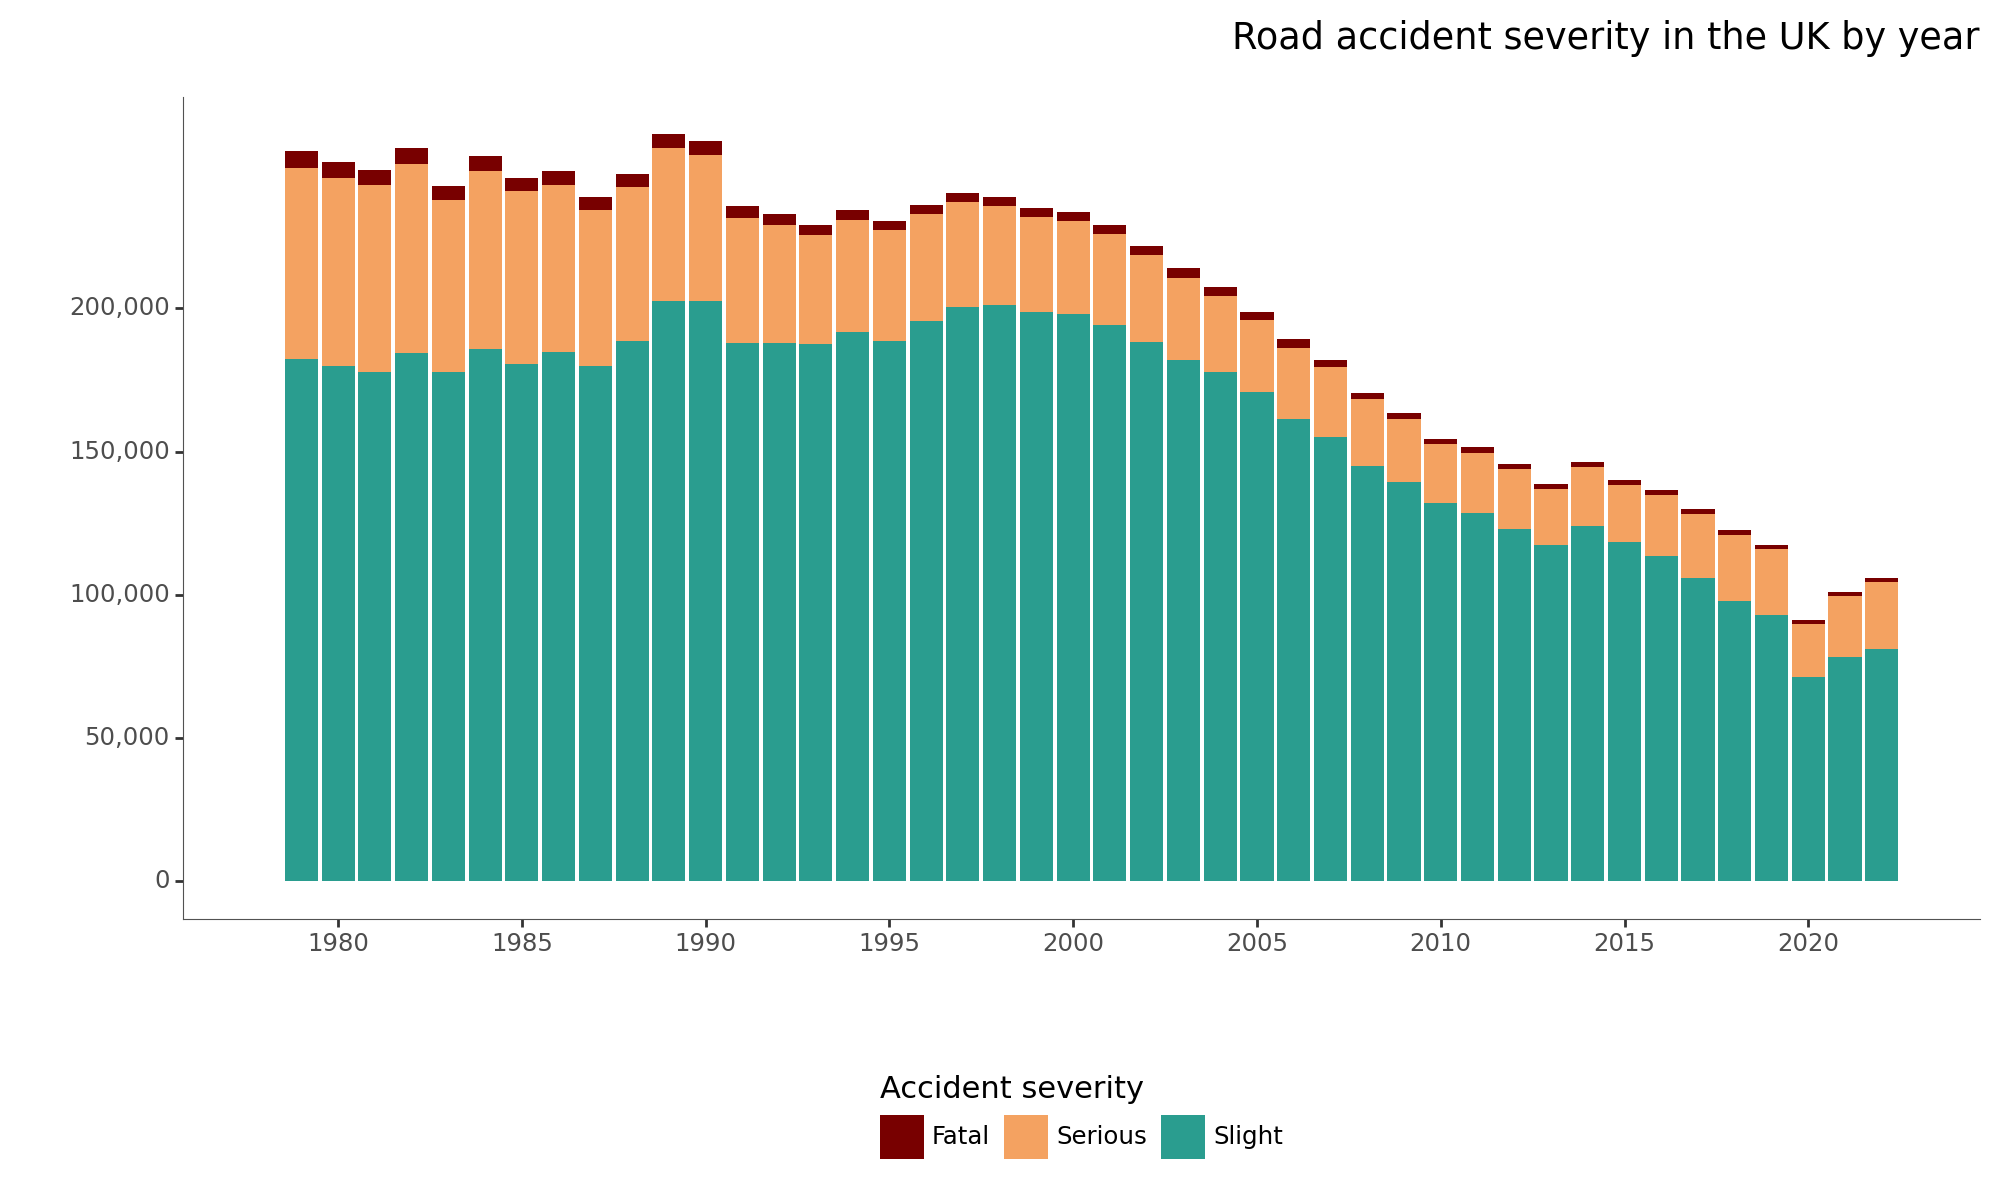

In [6]:
### Accident severity by year
accident_severity_by_year = df_collisions.groupby(['accident_year', 'accident_severity']).size().reset_index(name='count')

plot = (
    ggplot(accident_severity_by_year, aes(x='accident_year', y='count', fill='factor(accident_severity)')) +
    geom_bar(stat='identity') +
    labs(title='Road accident severity in the UK by year') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=1),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',
        figure_size=(10, 6)     
    ) +
    scale_x_continuous(breaks=range(1980, int(accident_severity_by_year['accident_year'].max()) + 1, 5),
                       labels=range(1980, int(accident_severity_by_year['accident_year'].max()) + 1, 5),
                       limits=(1978, None)) +
    scale_y_continuous(breaks=range(0, int(accident_severity_by_year['count'].max().max()) + 1, 50000),
                       labels=lambda x: ["{:,}".format(label) for label in x]) +
    scale_fill_manual(values=['#780000', '#f4a261', '#2a9d8f'], name='Accident severity', labels=['Fatal', 'Serious', 'Slight'])
)

print(plot)


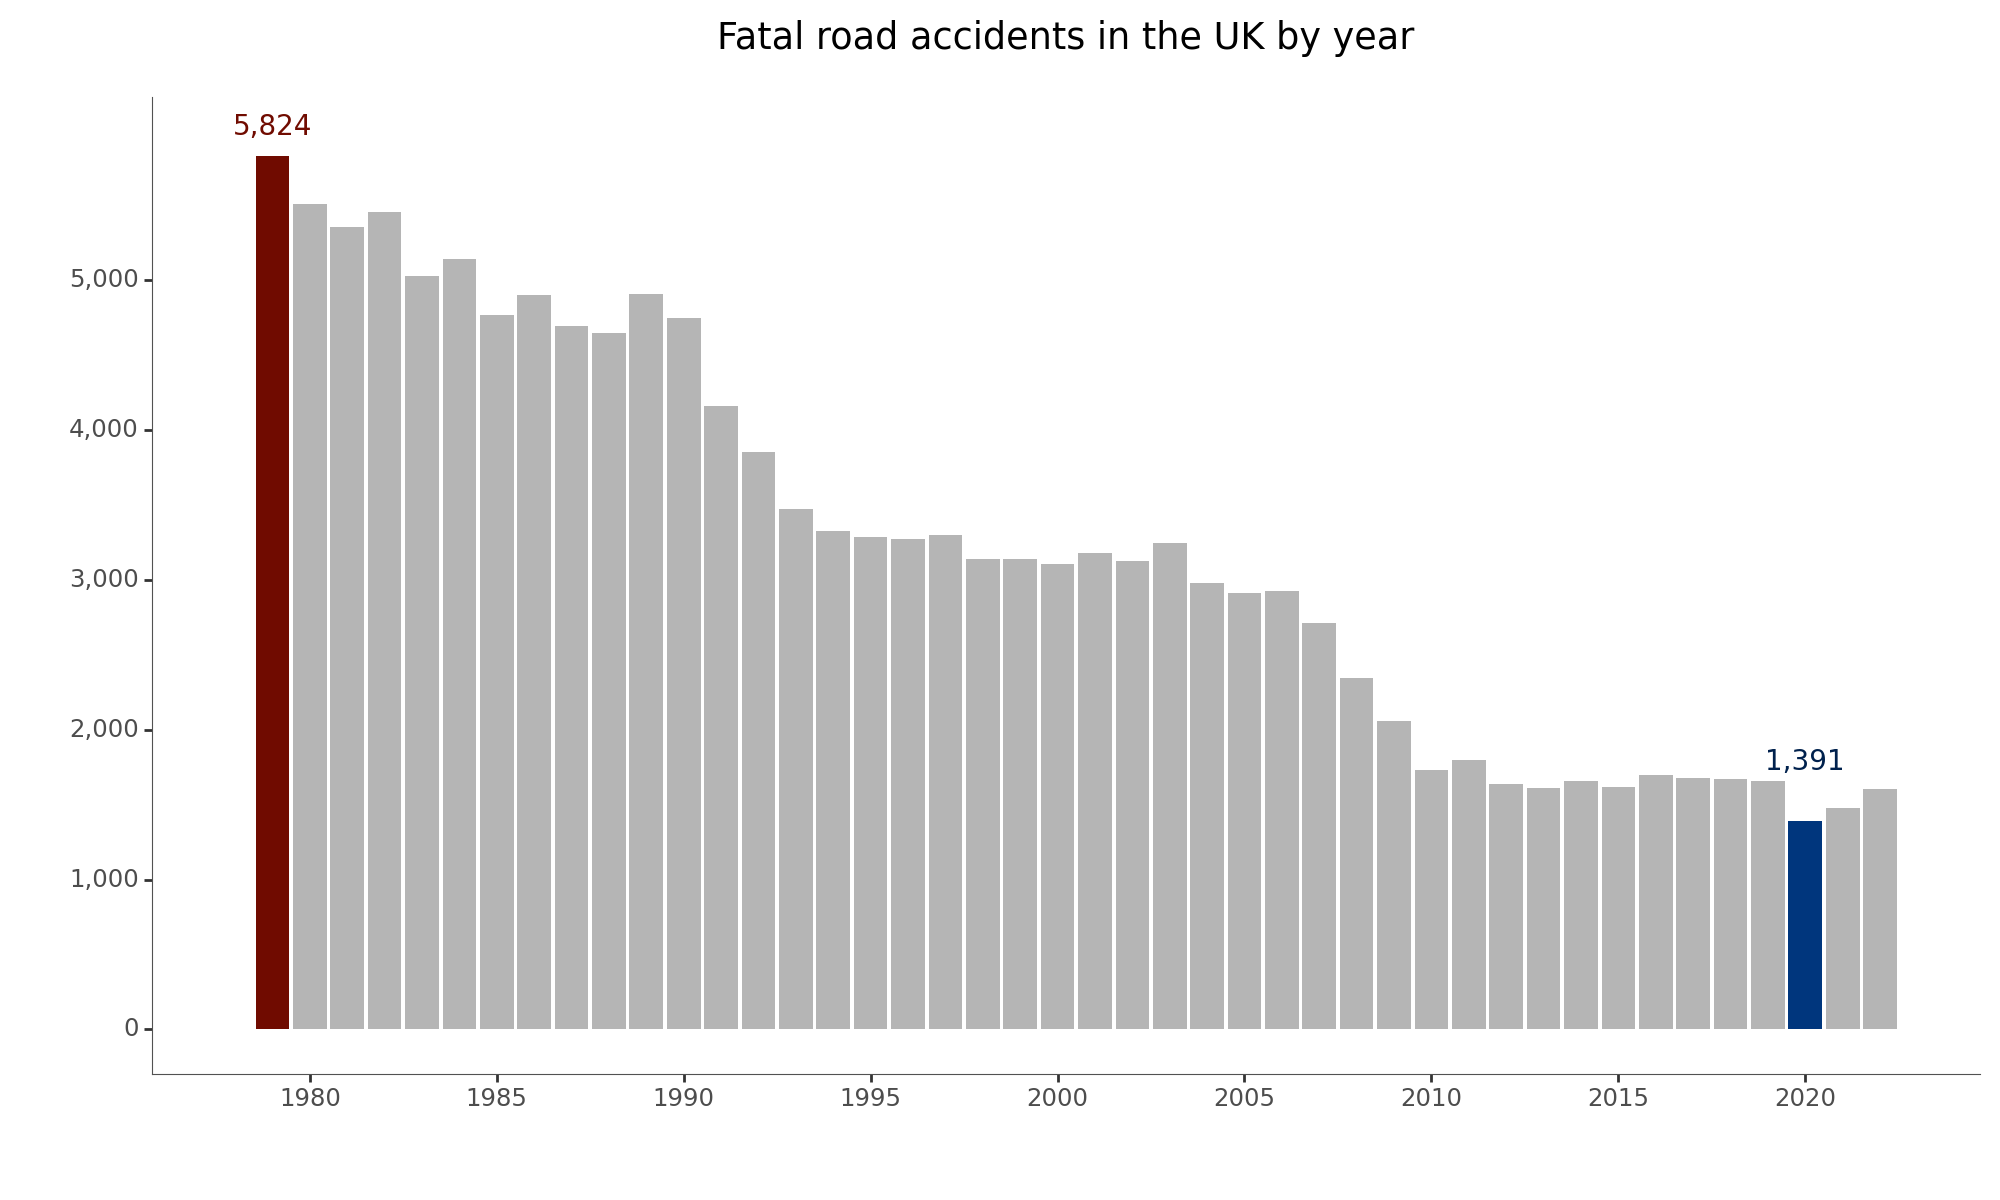

In [7]:
### Fatal accidents by year
fatal_by_year = df_collisions[df_collisions['accident_severity'] == 1].groupby('accident_year').size()

df_accidents = pd.DataFrame({'Year': fatal_by_year.index, 'Accident Count': fatal_by_year.values})

plot = (
    ggplot(df_accidents, aes(x='Year', y='Accident Count')) +
    geom_bar(stat='identity', fill='#b5b5b5') +
    geom_bar(df_accidents[df_accidents['Year'] == 2020], aes(x='Year', y='Accident Count'), fill='#00367d', stat='identity') +
    geom_text(df_accidents[df_accidents['Year'] == 2020], aes(x='Year', y='Accident Count', label='Accident Count'), color='#00214d', va='bottom', size=10, nudge_y=300, format_string="{:,}") +
    geom_bar(df_accidents[df_accidents['Year'] == 1979], aes(x='Year', y='Accident Count'), fill='#700b00', stat='identity') + 
    geom_text(df_accidents[df_accidents['Year'] == 1979], aes(x='Year', y='Accident Count', label='Accident Count'), color='#700b00', va='bottom', size=10, nudge_y=100, format_string="{:,}") +
    labs(title='Fatal road accidents in the UK by year') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),  
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        figure_size=(10, 6) 
    ) +
    scale_x_continuous(breaks=range(1980, int(df_accidents['Year'].max()) + 1, 5),
                       labels=range(1980, int(df_accidents['Year'].max()) + 1, 5),
                       limits=(1978, None)) +  
    scale_y_continuous(breaks=range(0, int(df_accidents['Accident Count'].max()) + 1, 1000),
                       labels=lambda x: ["{:,}".format(label) for label in x])  
)

print(plot)

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_9292\2546904548.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


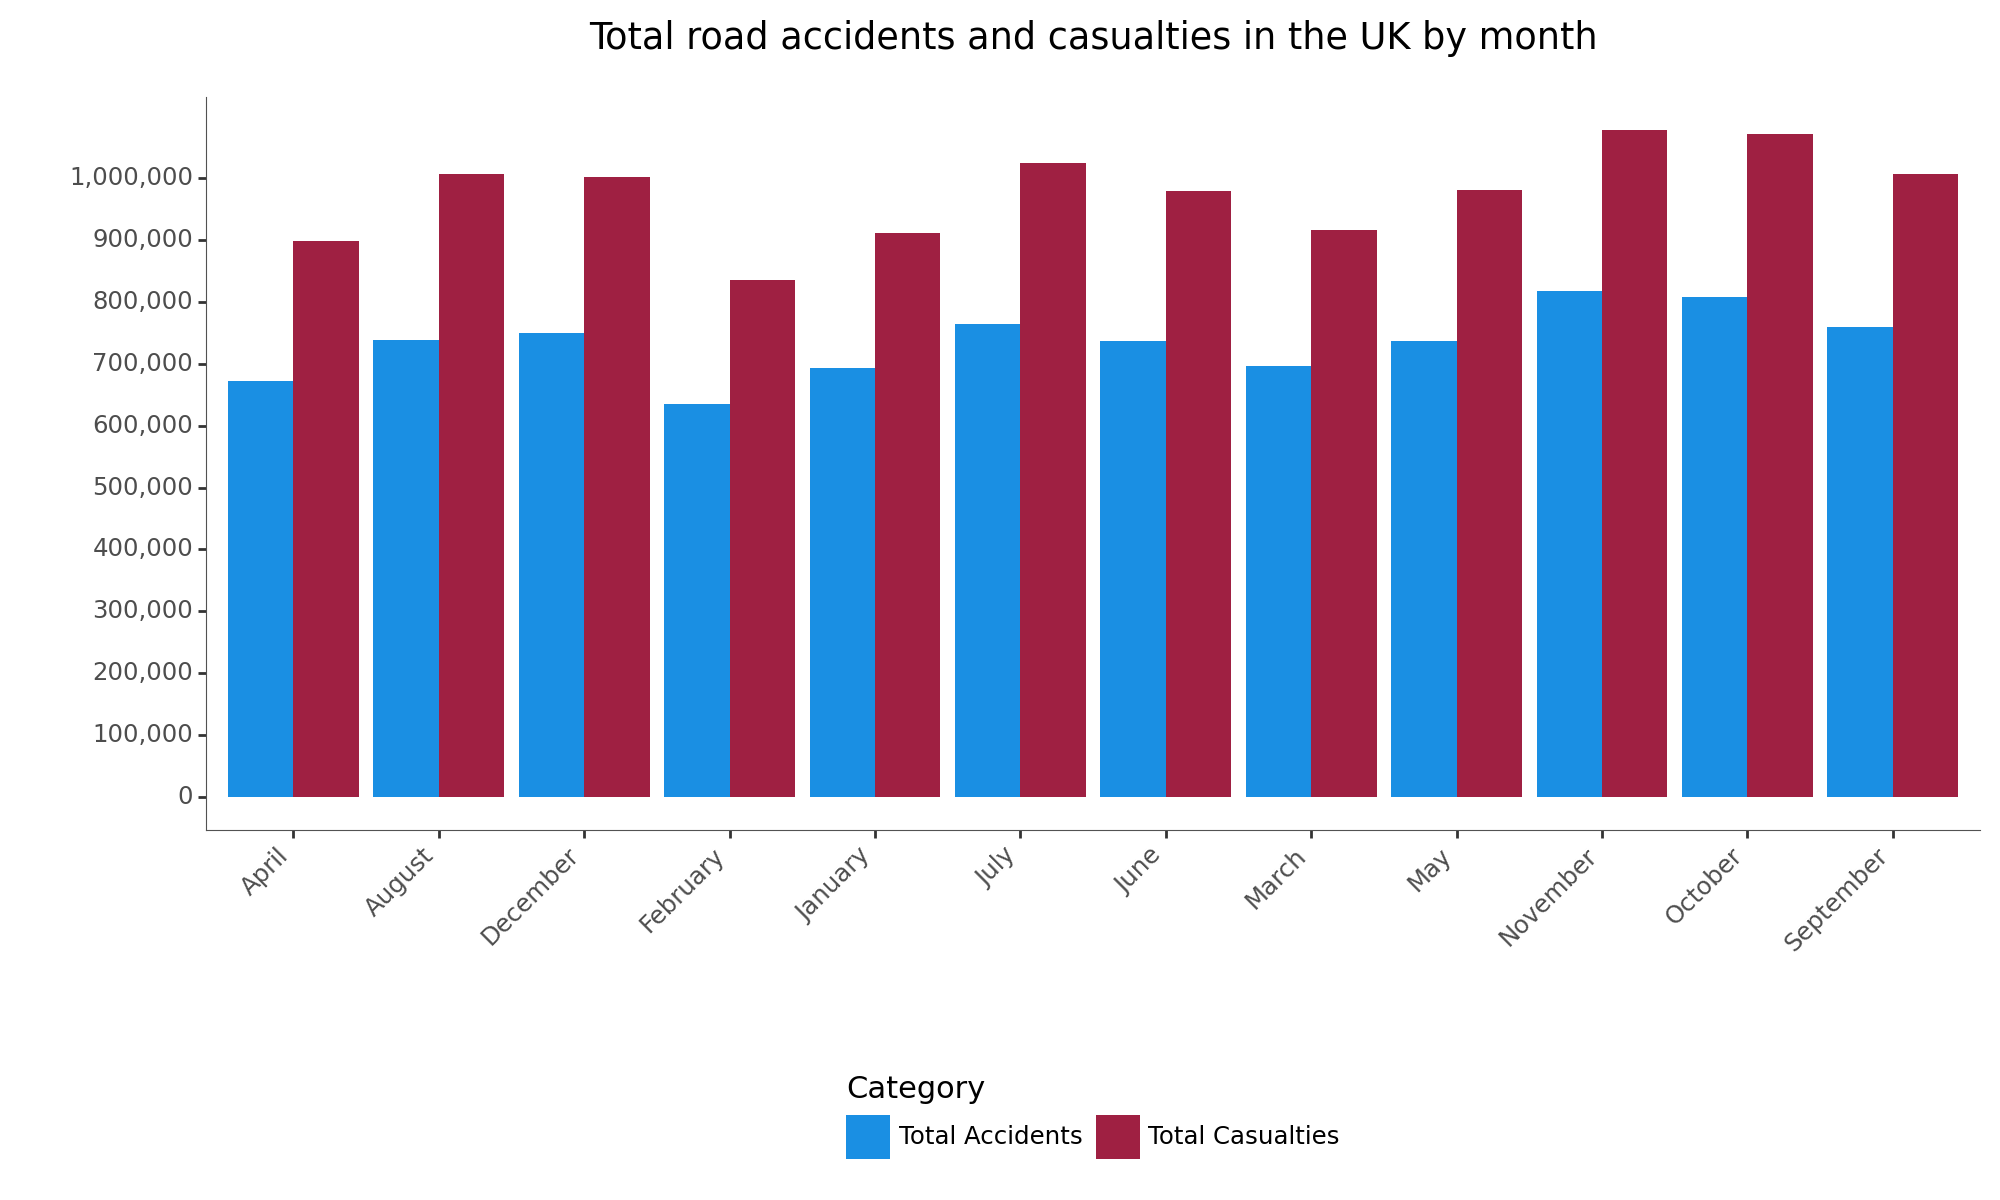

In [8]:
### Total number of accidents and casualties by month
df_collisions['date'] = pd.to_datetime(df_collisions['date'])
df_collisions['month'] = df_collisions['date'].dt.month

total_acc_by_month  = df_collisions.groupby('month').size()
total_cas_by_month = df_collisions.groupby('month')['number_of_casualties'].sum()

df_accidents_by_month = pd.DataFrame({'total_accidents': total_acc_by_month,'total_casualties': total_cas_by_month}).reset_index()

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_accidents_by_month['month_name'] = df_accidents_by_month['month'].map(month_names)

plot = (
    ggplot(pd.melt(df_accidents_by_month, id_vars='month_name', var_name='variable', value_vars=['total_accidents', 'total_casualties']),
           aes(x='factor(month_name)', y='value', fill='variable')) +
    geom_bar(position='dodge', stat='identity') +
    labs(title='Total road accidents and casualties in the UK by month') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5), 
        axis_title_x=element_text(color="white"),  
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',  
        figure_size=(10, 6)  
    ) +
    scale_y_continuous(breaks=range(0, int(df_accidents_by_month[['total_accidents', 'total_casualties']].max().max()) + 1, 100000),
                       labels=lambda x: ["{:,}".format(label) for label in x]) +
    scale_fill_manual(values=['#1A8FE3', '#9F2042'], name='Category', labels=['Total Accidents', 'Total Casualties'])
)

print(plot)

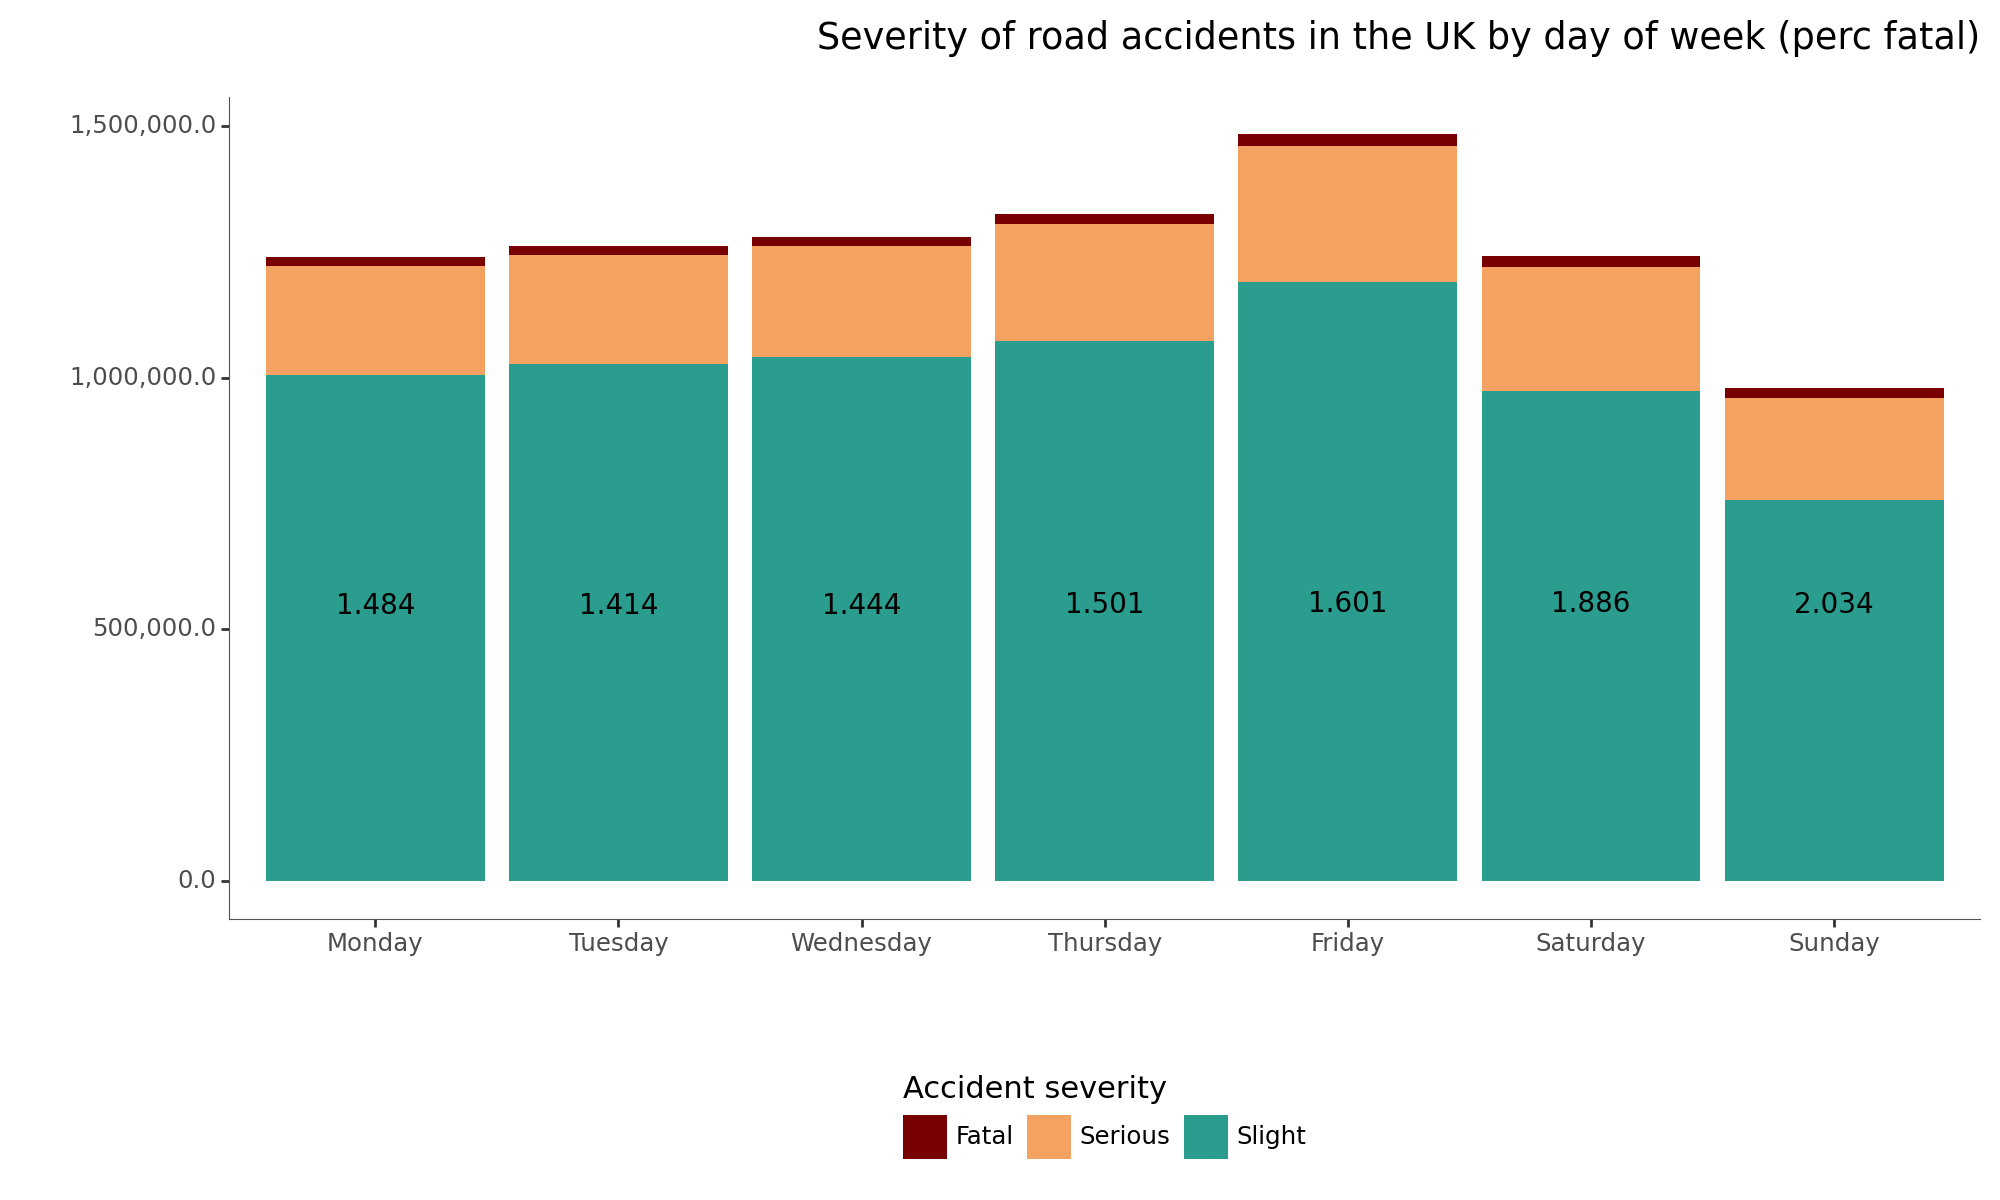

In [9]:
### Total number of accidents by day of week
df_accident_severity_by_day = df_collisions.groupby(['day_of_week', 'accident_severity']).size().reset_index(name='count')

total_count_by_day = df_accident_severity_by_day.groupby('day_of_week')['count'].transform('sum')
df_accident_severity_by_day['percentage'] = (df_accident_severity_by_day['count'] / total_count_by_day) * 100

days_names = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday',
}

df_accident_severity_by_day['day_name'] = df_accident_severity_by_day['day_of_week'].map(days_names)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fatal_labels = df_accident_severity_by_day[df_accident_severity_by_day['accident_severity'] == 1]

plot = (
    ggplot(df_accident_severity_by_day, aes(x='day_name', y='count', fill='factor(accident_severity)')) +
    geom_bar(stat='identity') +
    geom_text(aes(label='percentage'), data=round(fatal_labels, 3), va='bottom', size=10, nudge_y=500000, format_string="{:,}") +
    labs(title='Severity of road accidents in the UK by day of week (perc fatal)') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=1),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',
        figure_size=(10, 6)  
    ) +
    scale_x_discrete(breaks=days_order, limits=days_order) + 
    scale_fill_manual(values=['#780000', '#f4a261', '#2a9d8f'], name='Accident severity', labels=['Fatal', 'Serious', 'Slight'])+
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x]) 
)

print(plot)


C:\Users\Nikolay\AppData\Local\Temp\ipykernel_9292\2883896810.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


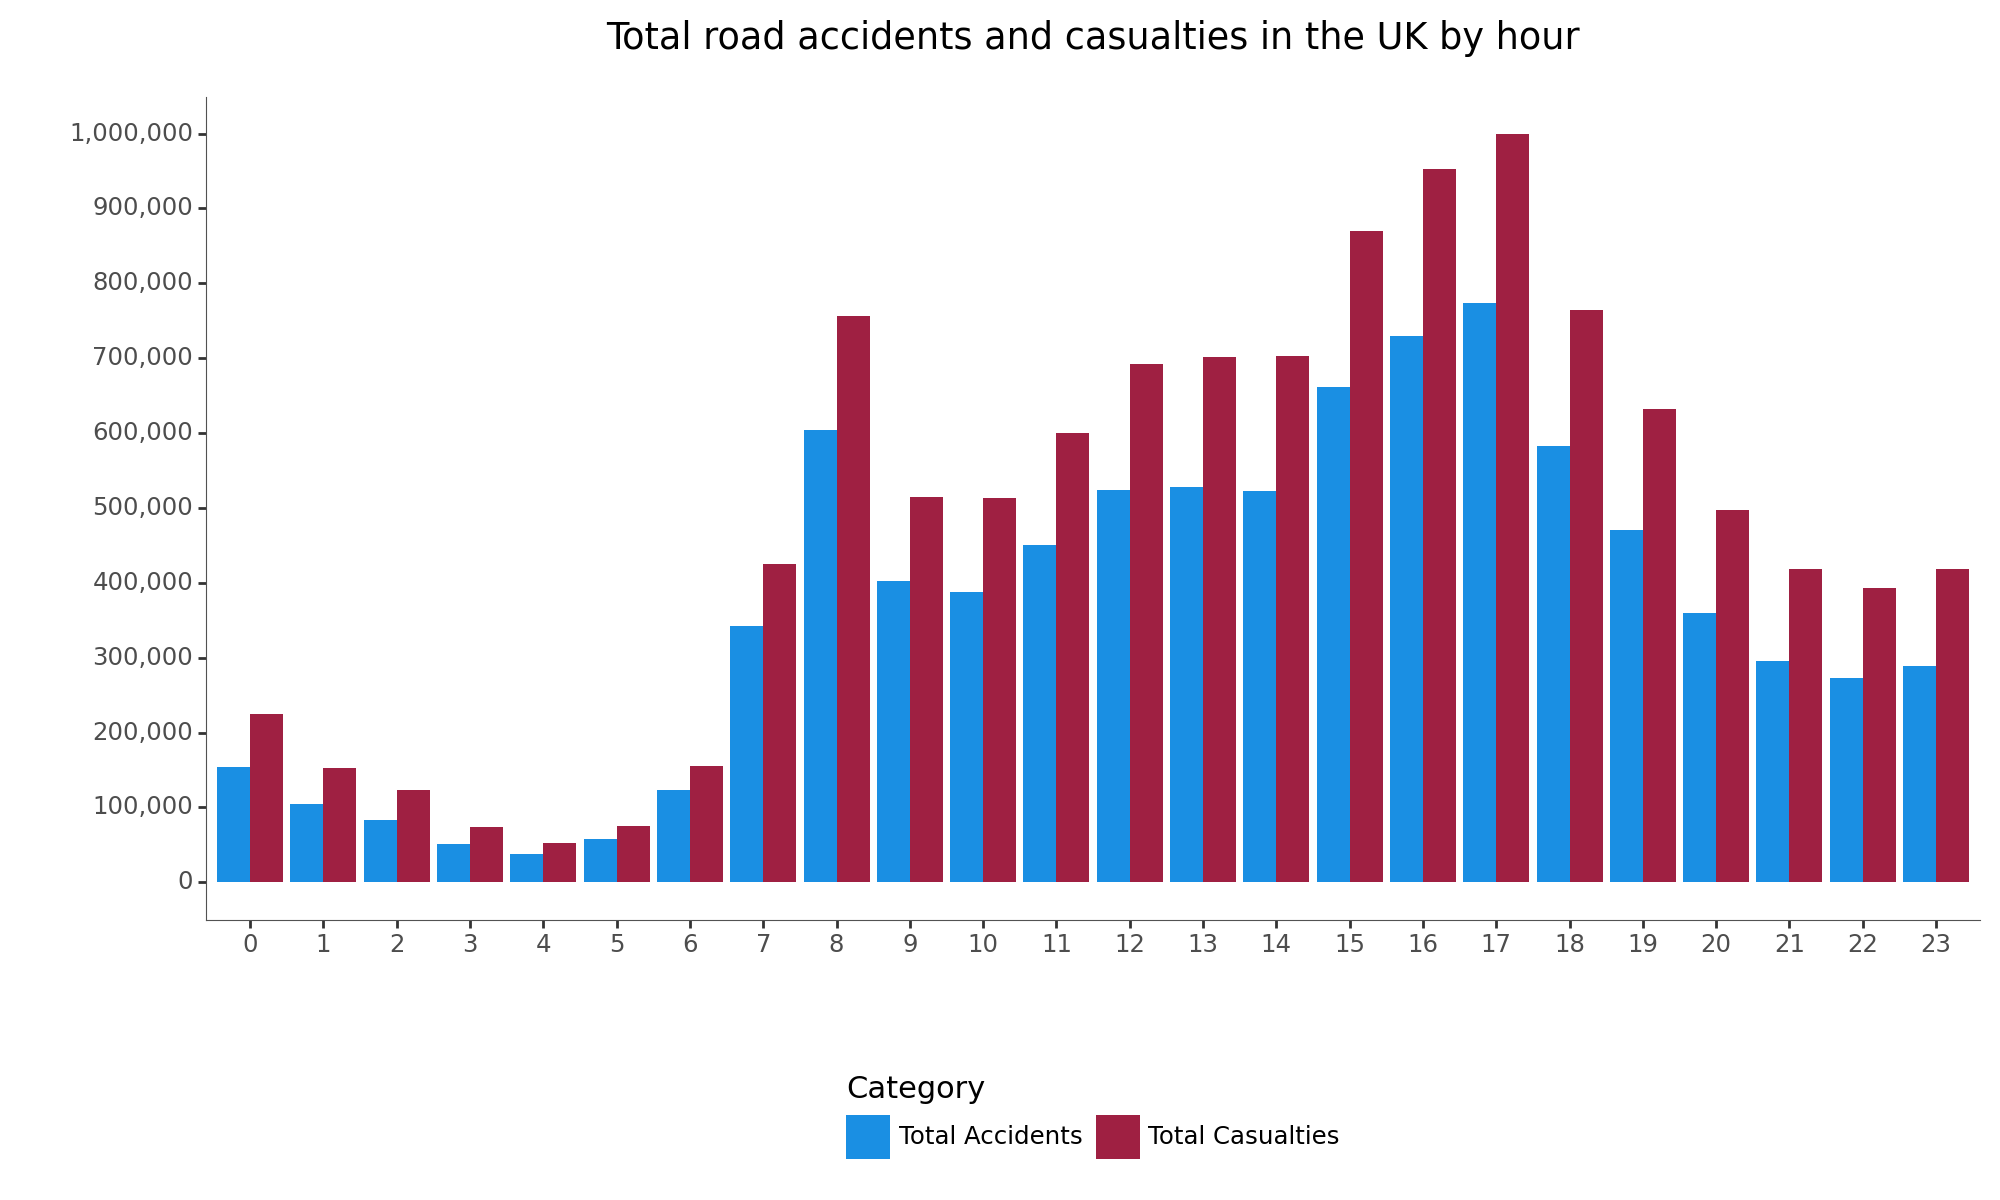

In [10]:
### Total number of accidents and casualties by hour
df_collisions['time'] = pd.to_datetime(df_collisions['time'])

total_acc_by_time = df_collisions.groupby('time').size()
total_cas_by_time = df_collisions.groupby('time')['number_of_casualties'].sum()

df_total_acc_cas_by_time = pd.DataFrame({'total_accidents': total_acc_by_time,'total_casualties': total_cas_by_time}).reset_index()

df_total_acc_cas_by_time['hour'] = df_total_acc_cas_by_time['time'].dt.hour
df_total_acc_cas_by_time['minute'] = df_total_acc_cas_by_time['time'].dt.minute

total_acc_by_hour = df_total_acc_cas_by_time.groupby('hour')['total_accidents'].sum()
total_cas_by_hour = df_total_acc_cas_by_time.groupby('hour')['total_casualties'].sum()

df_total_acc_cas_by_hour = pd.DataFrame({'total_accidents': total_acc_by_hour,'total_casualties': total_cas_by_hour}).reset_index()

hours_order = list(range(24))

plot = (
    ggplot(pd.melt(df_total_acc_cas_by_hour, id_vars='hour', var_name='variable', value_vars=['total_accidents', 'total_casualties']),
           aes(x='factor(hour)', y='value', fill='variable')) +
    geom_bar(position='dodge', stat='identity') +
    labs(title='Total road accidents and casualties in the UK by hour') +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=0.5),  
        axis_title_x=element_text(color="white"), 
        axis_title_y=element_text(color="white"),
        legend_position='bottom',  
        legend_box='horizontal',  
        figure_size=(10, 6)  
    ) +
    scale_y_continuous(breaks=range(0, int(df_accidents_by_month[['total_accidents', 'total_casualties']].max().max()) + 1, 100000),
                       labels=lambda x: ["{:,}".format(label) for label in x]) +
    scale_fill_manual(values=['#1A8FE3', '#9F2042'], name='Category', labels=['Total Accidents', 'Total Casualties'])
)

print(plot)


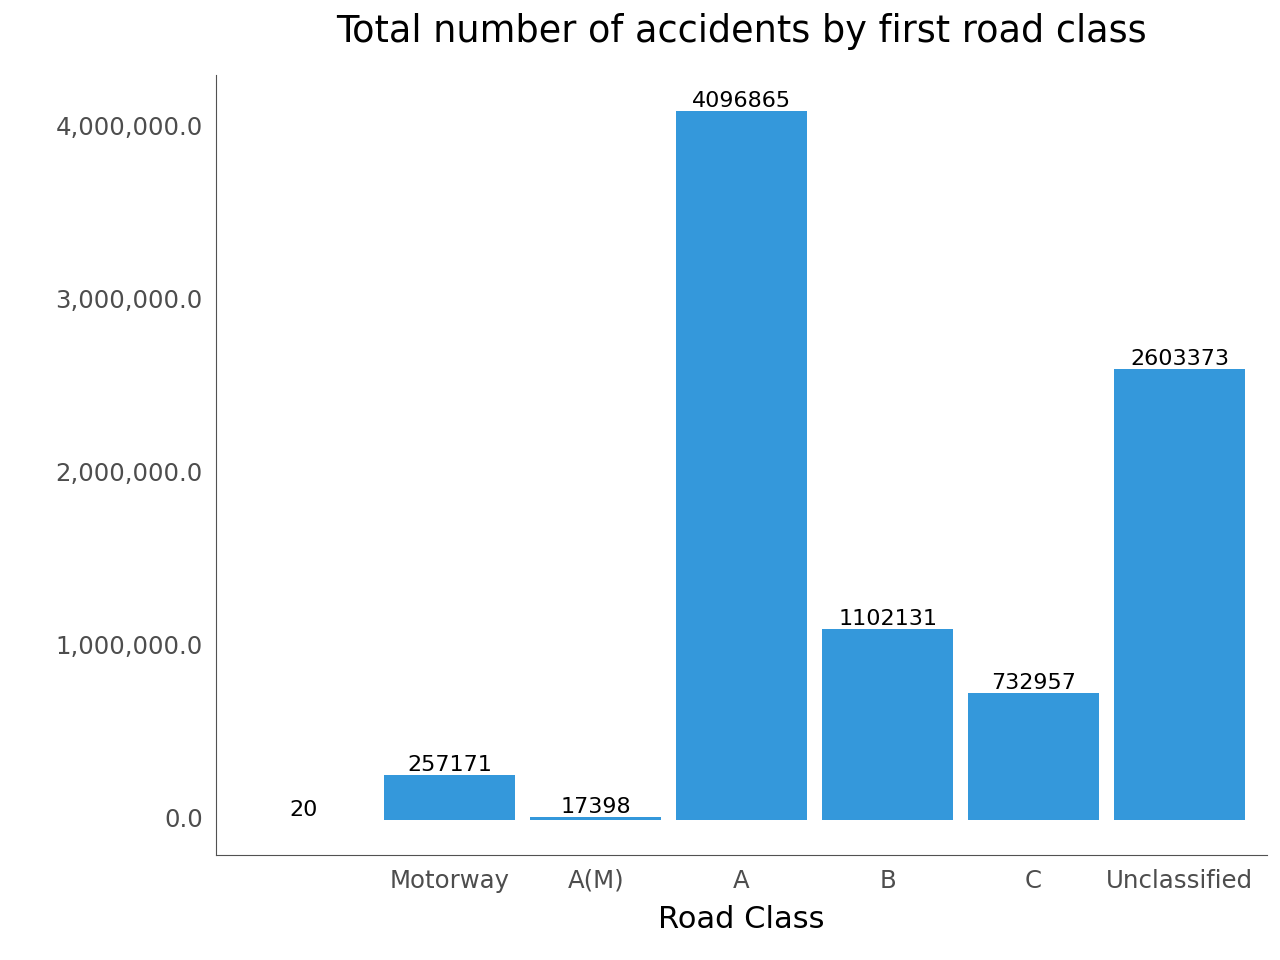

In [11]:
### Total number of accidents by first road class
first_road_class = df_collisions.groupby('first_road_class')['accident_index'].count()

df_accidents_first_road_class = pd.DataFrame({'road_class': first_road_class.index, 'accident_count': first_road_class.values})

road_class_names = {
    1: 'Motorway',
    2: 'A(M)',
    3: 'A',
    4: 'B',
    5: 'C',
    6: 'Unclassified',
    9: 'Unknown (self rep only)',
   -1: 'Data missing or out of range'
}

first_road_type_order = list(range(1, 7))

df_accidents_first_road_class['road_class_names'] = df_accidents_first_road_class['road_class'].map(road_class_names)

plot = (
    ggplot(df_accidents_first_road_class, aes(x='factor(road_class)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by first road class', x='Road Class') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="black"),
        axis_title_y=element_text(color="white")
    ) +
    scale_x_discrete(breaks=first_road_type_order, labels=[road_class_names[i] for i in first_road_type_order]) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)

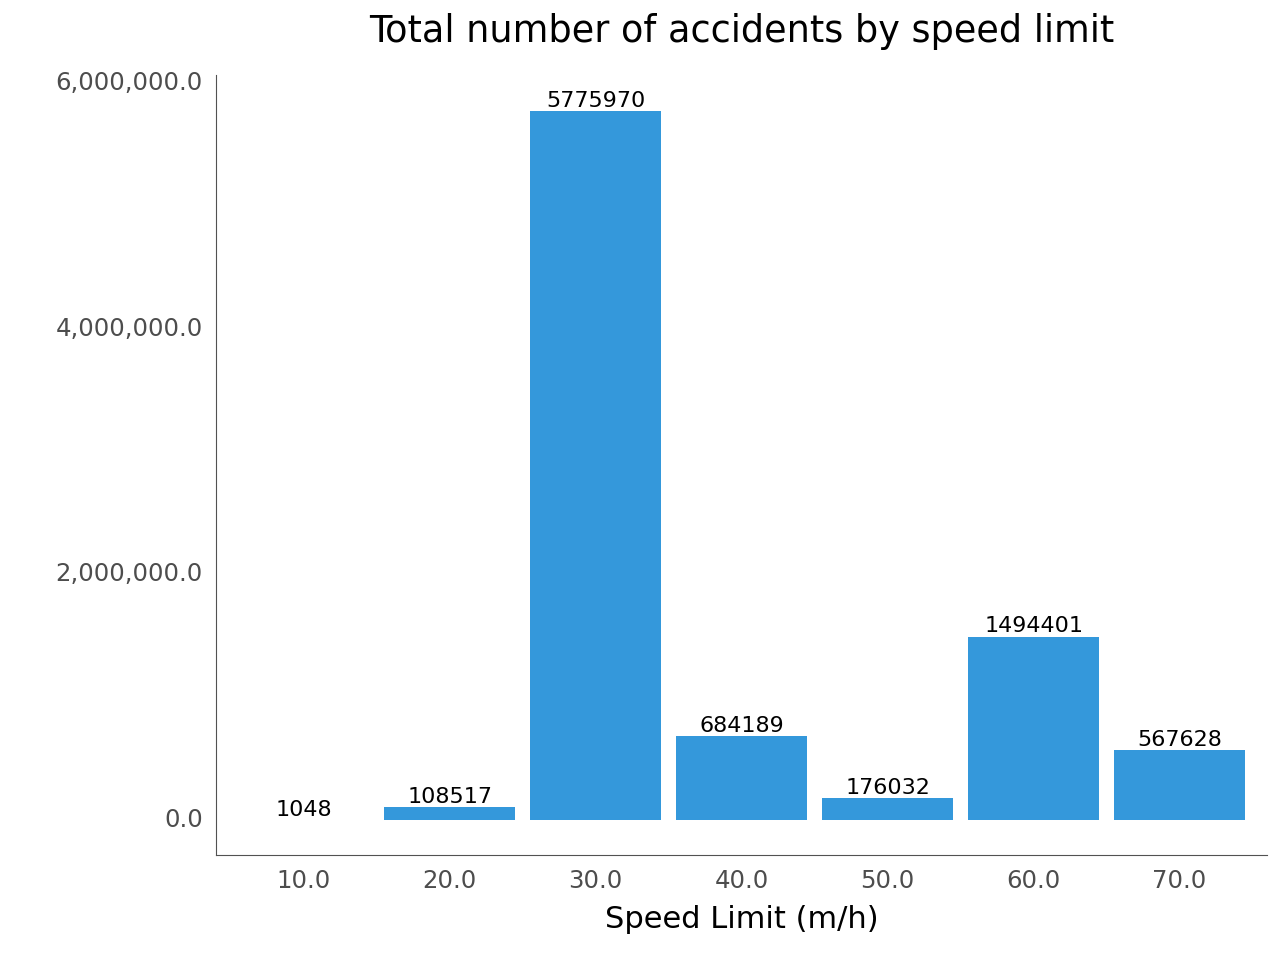

In [12]:
### Total number of accidents by speed limit
acc_speed_limit = df_collisions.groupby('speed_limit')['accident_index'].count()
df_acc_speed_limit = pd.DataFrame({'speed_limit': acc_speed_limit.index, 'accident_count': acc_speed_limit.values})
df_acc_speed_limit = df_acc_speed_limit[df_acc_speed_limit['accident_count'] > 1000]

plot = (
    ggplot(df_acc_speed_limit, aes(x='factor(speed_limit)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by speed limit', x='Speed Limit (m/h)') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=0, hjust=0.5),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="black"),
        axis_title_y=element_text(color="white")
    ) +
    scale_x_discrete(labels=list(df_acc_speed_limit['speed_limit'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)

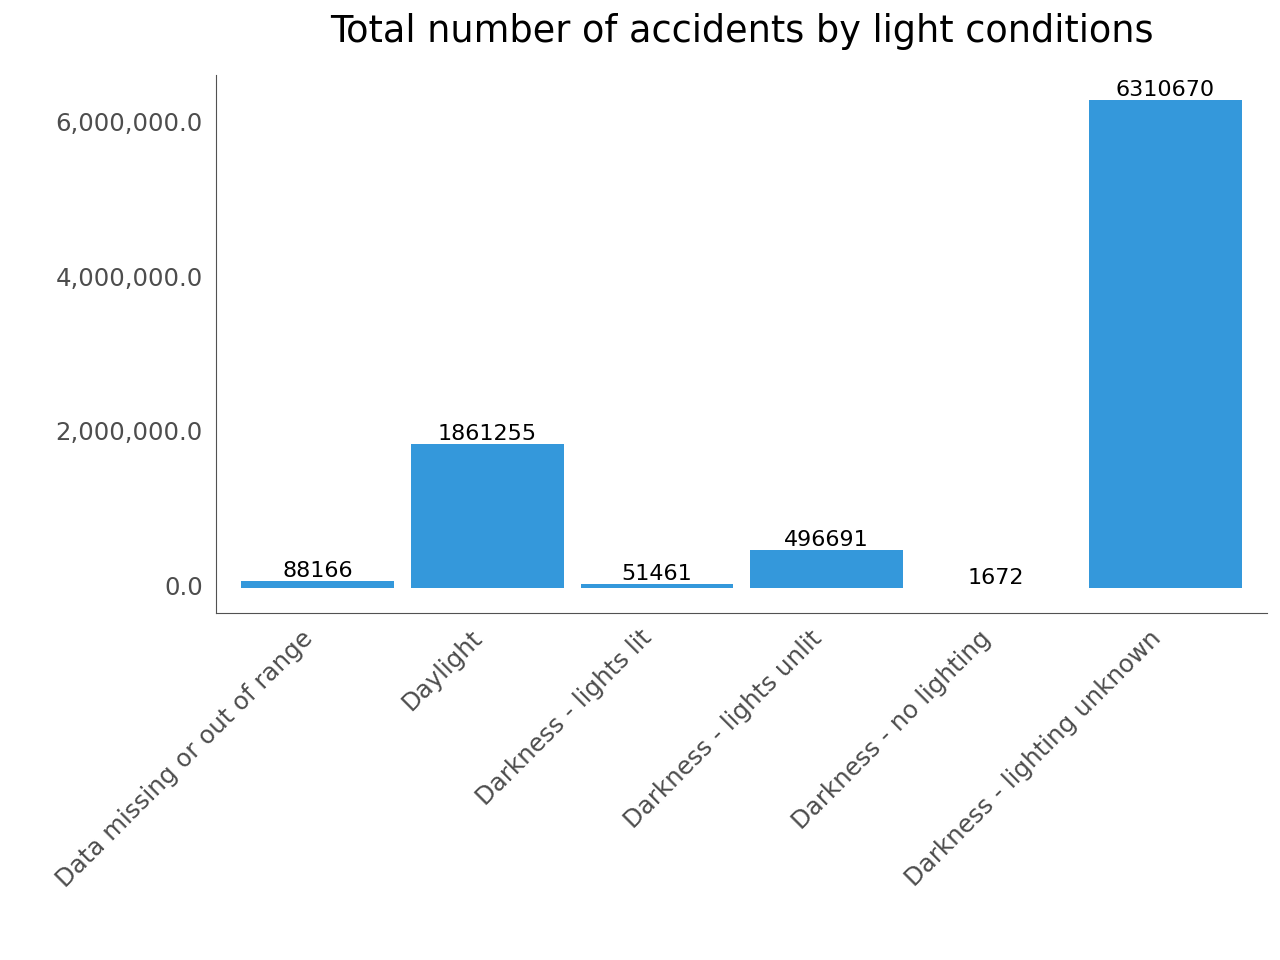

In [13]:
### Total number of accidents by light conditions
acc_light_cond = df_collisions.groupby('light_conditions')['accident_index'].count()
df_acc_light_cond = pd.DataFrame({'light_conditions': acc_light_cond.index, 'accident_count': acc_light_cond.values})

light_cond_names = {
    1: 'Daylight',
    4: 'Darkness - lights lit',
    5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting',
    7: 'Darkness - lighting unknown',
   -1: 'Data missing or out of range'
}

df_acc_light_cond['light_cond_names'] = df_acc_light_cond['light_conditions'].map(light_cond_names)

plot = (
    ggplot(df_acc_light_cond, aes(x='factor(light_cond_names)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by light conditions', x='light_cond_names') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white")
    ) +
    scale_x_discrete(labels=list(df_acc_light_cond['light_cond_names'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)

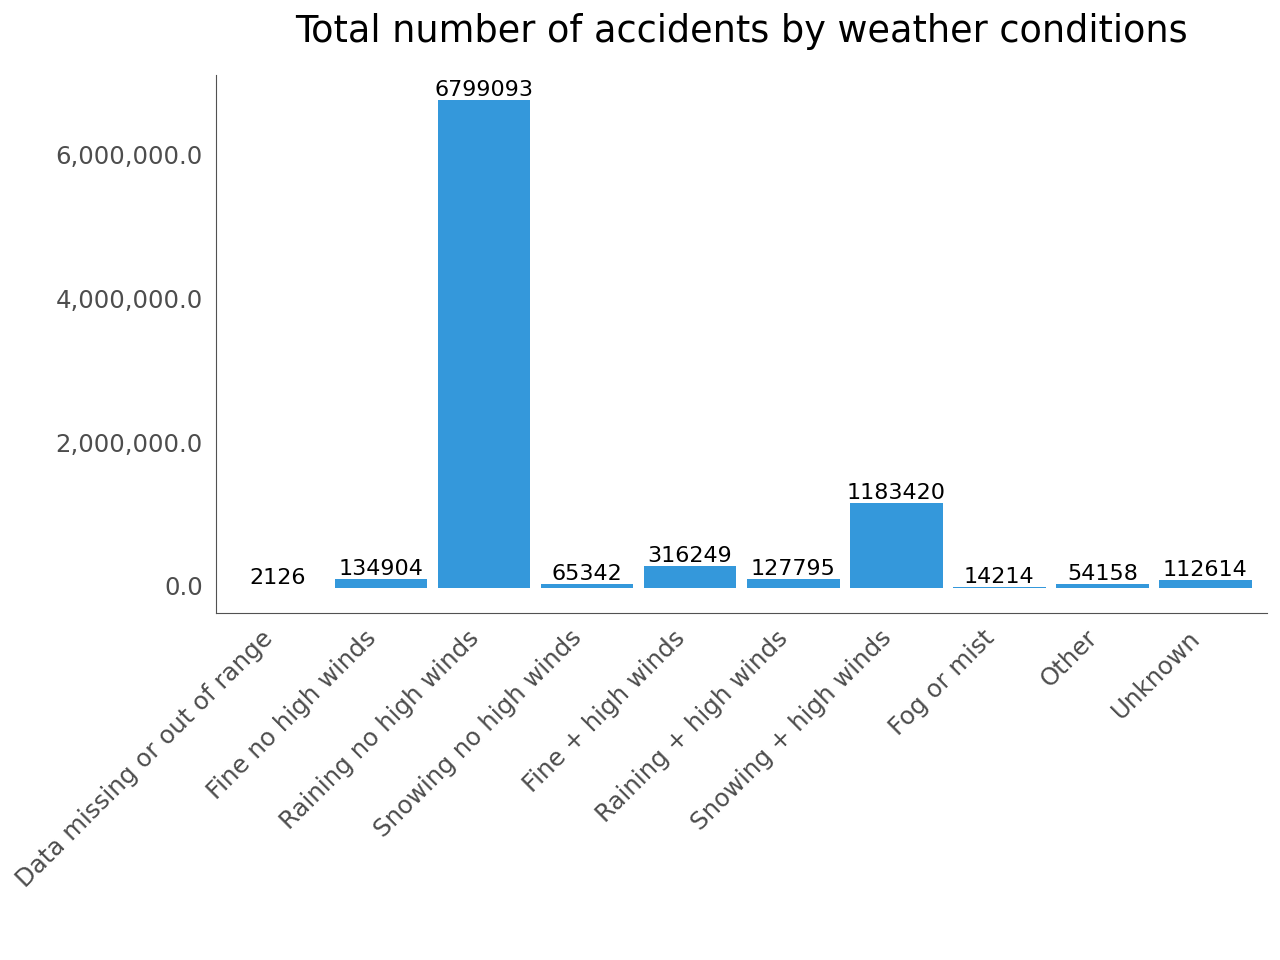

In [14]:
### Total number of accidents by weather conditions
acc_weather_cond = df_collisions.groupby('weather_conditions')['accident_index'].count()
df_acc_weather_cond = pd.DataFrame({'weather_conditions': acc_weather_cond.index, 'accident_count': acc_weather_cond.values})

weather_conditions_names = {
    1: 'Fine no high winds',
    2: 'Raining no high winds',
    3: 'Snowing no high winds',
    4: 'Fine + high winds',
    5: 'Raining + high winds',
    6: 'Snowing + high winds',
    7: 'Fog or mist',
    8: 'Other',
    9: 'Unknown',
   -1: 'Data missing or out of range'
}

df_acc_weather_cond['weather_conditions_names'] = df_acc_weather_cond['weather_conditions'].map(weather_conditions_names)

plot = (
    ggplot(df_acc_weather_cond, aes(x='factor(weather_conditions_names)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by weather conditions', x='weather_conditions_names') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white")
    ) +
    scale_x_discrete(labels=list(df_acc_weather_cond['weather_conditions_names'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)


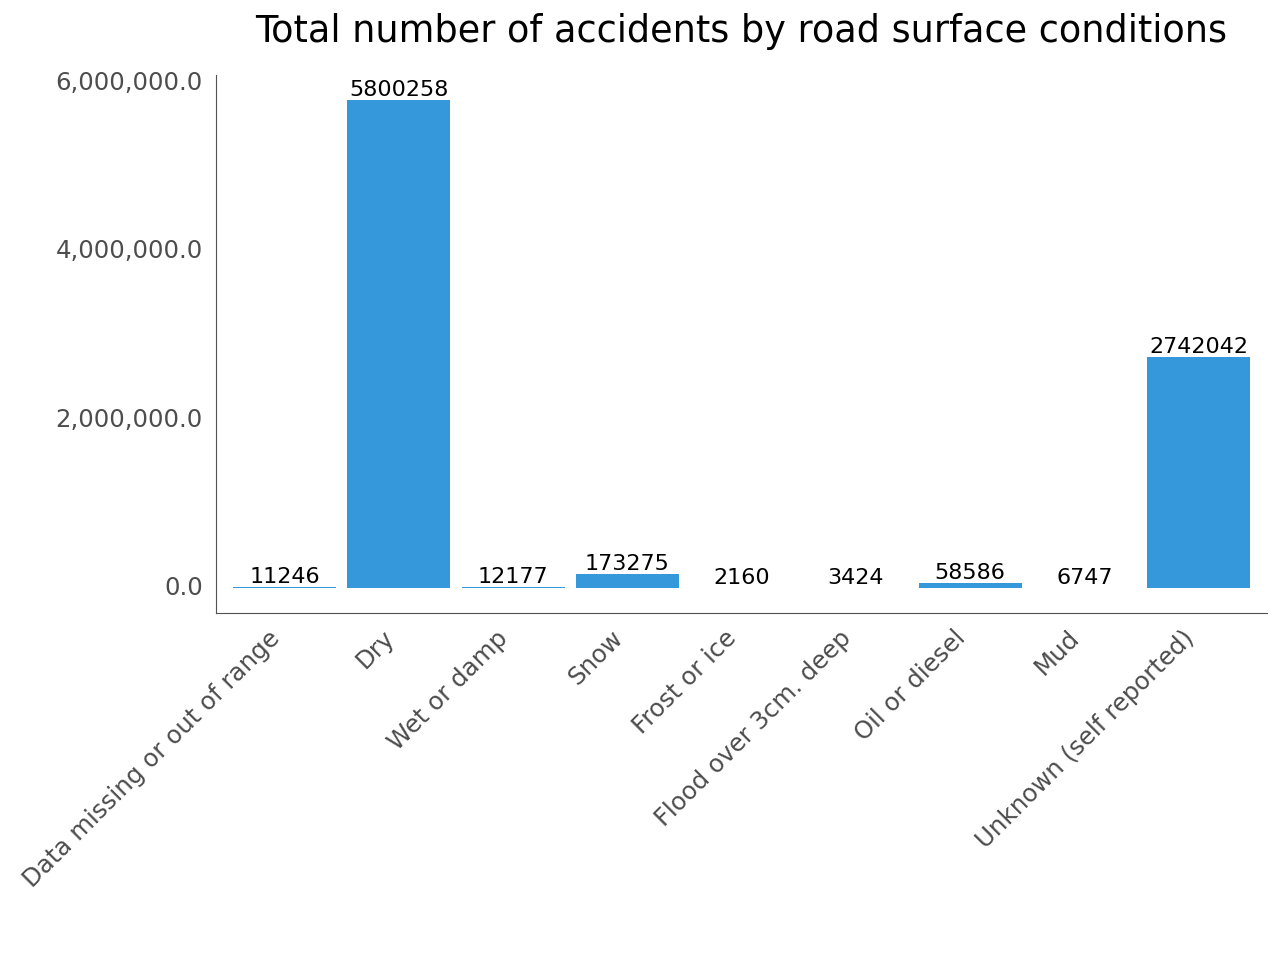

In [15]:
### Total number of accidents by road surface conditions
acc_road_surf_cond = df_collisions.groupby('road_surface_conditions')['accident_index'].count()
df_acc_road_surf_cond = pd.DataFrame({'road_surface_conditions': acc_road_surf_cond.index, 'accident_count': acc_road_surf_cond.values})

road_surface_conditions_names = {
    1: 'Dry',
    2: 'Wet or damp',
    3: 'Snow',
    4: 'Frost or ice',
    5: 'Flood over 3cm. deep',
    6: 'Oil or diesel',
    7: 'Mud',
    9: 'Unknown (self reported)',
   -1: 'Data missing or out of range',
}

df_acc_road_surf_cond['road_surface_conditions_names'] = df_acc_road_surf_cond['road_surface_conditions'].map(road_surface_conditions_names)

plot = (
    ggplot(df_acc_road_surf_cond, aes(x='factor(road_surface_conditions_names)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by road surface conditions', x='road_surface_conditions_names') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white")
    ) +
    scale_x_discrete(labels=list(df_acc_road_surf_cond['road_surface_conditions_names'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)


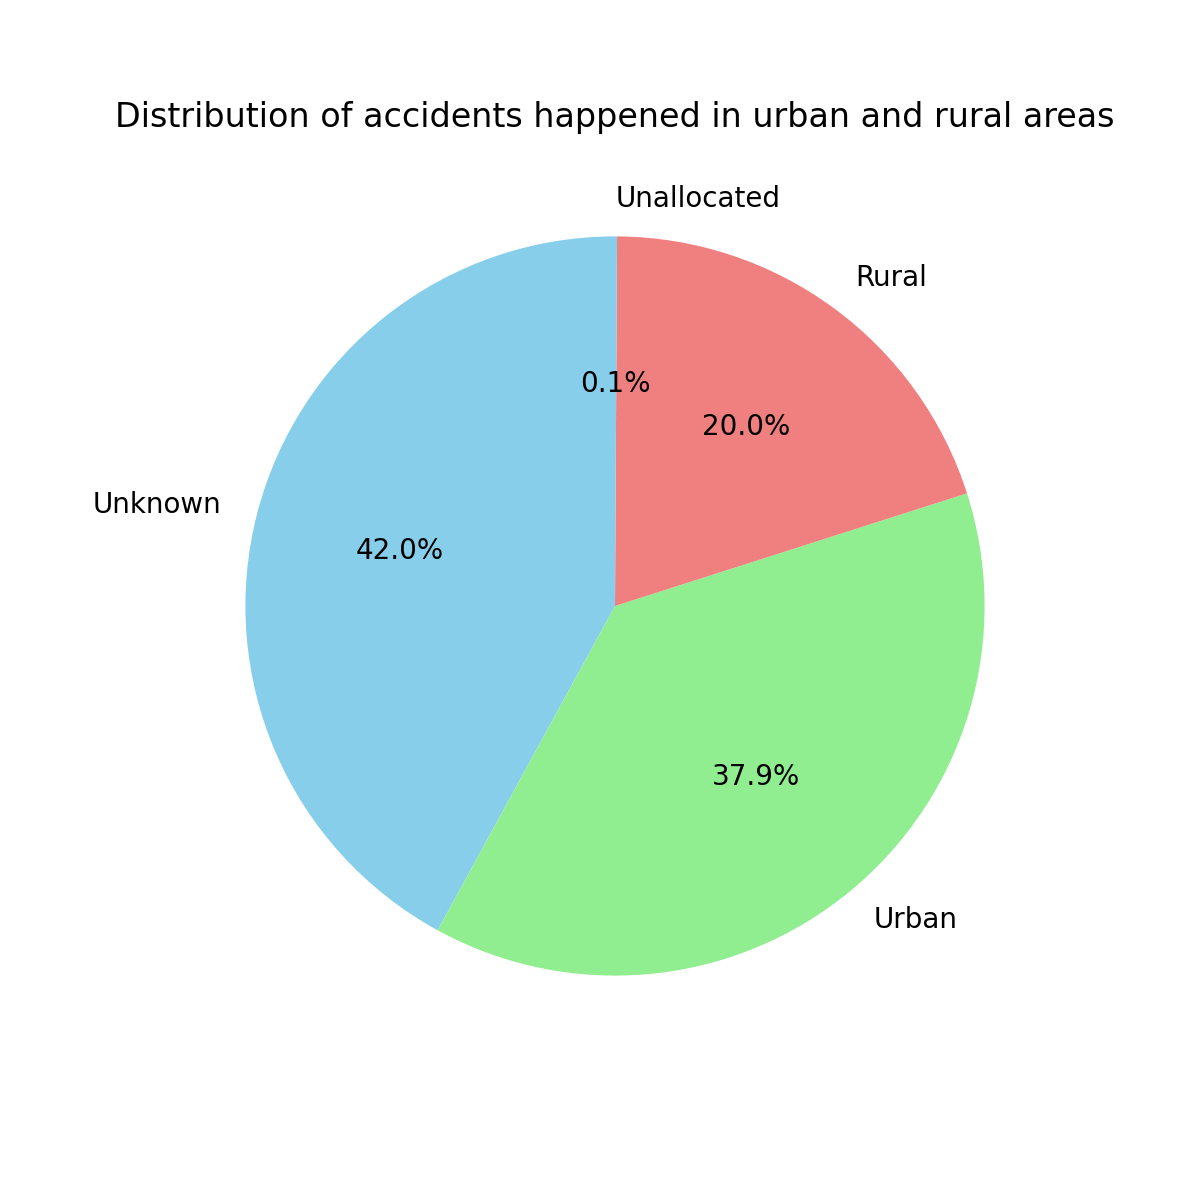

In [16]:
### Total number of accidents by urban/rural area (introduced in 1994)
import matplotlib.pyplot as plt

acc_urban_rural = df_collisions.groupby('urban_or_rural_area')['accident_index'].count()

df = pd.DataFrame({
    'urban_or_rural_area': acc_urban_rural.index,
    'count': acc_urban_rural.values,
    'area_type': ['Unknown', 'Urban', 'Rural', 'Unallocated']
})

plt.figure(figsize=(6, 6))
plt.pie(df['count'], labels=df['area_type'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of accidents happened in urban and rural areas')
plt.show()


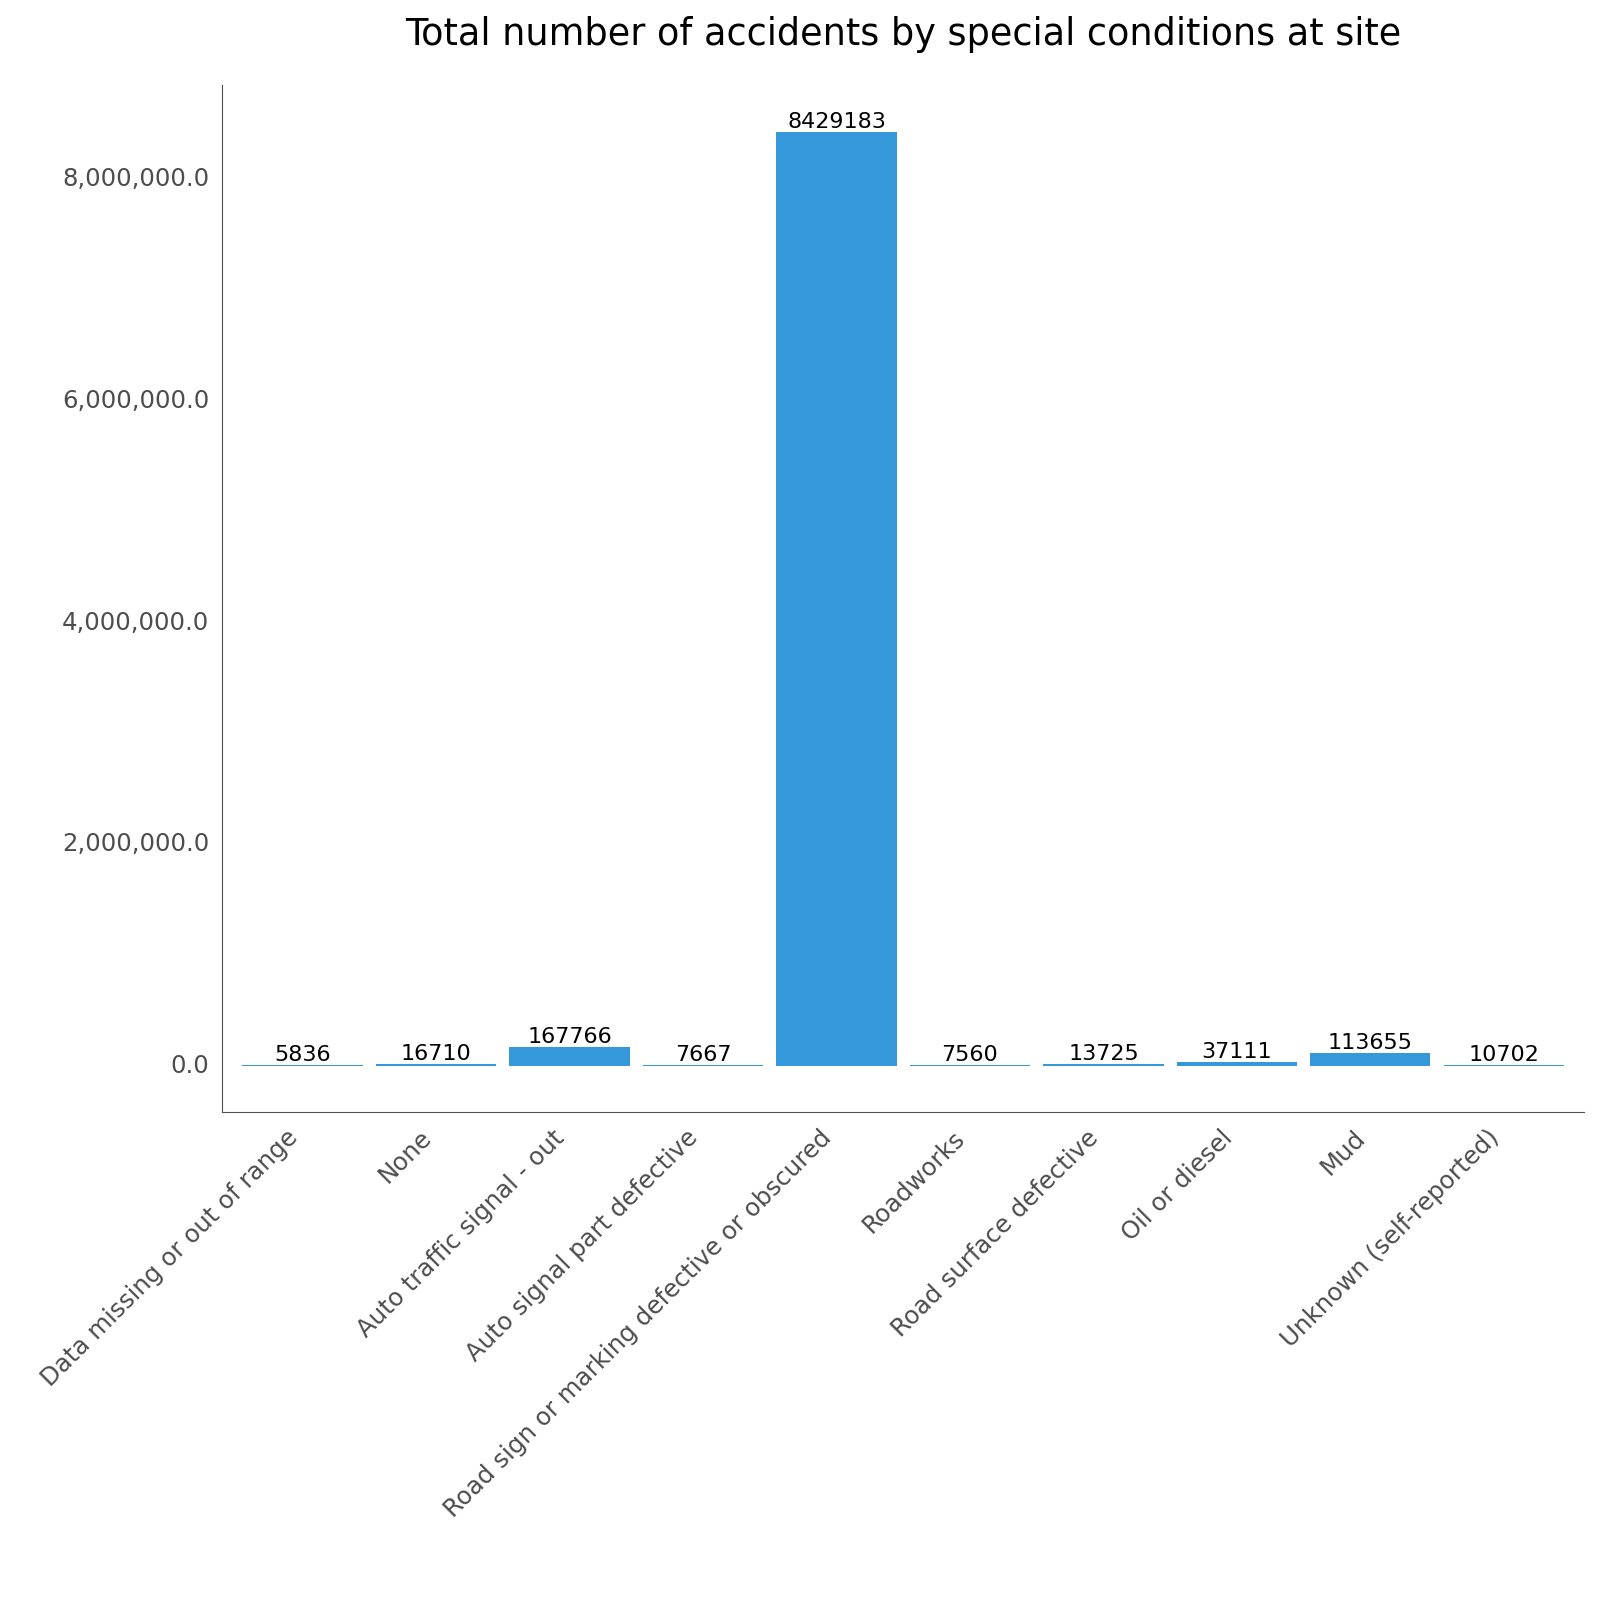

In [17]:
### Total accidents by special conditions at site
acc_special_cond= df_collisions.groupby('special_conditions_at_site')['accident_index'].count()
df_acc_special_cond= pd.DataFrame({'special_conditions_at_site': acc_special_cond.index, 'accident_count': acc_special_cond.values})

special_conditions_names = {
    0: 'None',
    1: 'Auto traffic signal - out',
    2: 'Auto signal part defective',
    3: 'Road sign or marking defective or obscured',
    4: 'Roadworks',
    5: 'Road surface defective',
    6: 'Oil or diesel',
    7: 'Mud',
   -1:'Data missing or out of range',
    9: 'Unknown (self-reported)'
}


df_acc_special_cond['special_conditions_names'] = df_acc_special_cond['special_conditions_at_site'].map(special_conditions_names)

plot = (
    ggplot(df_acc_special_cond, aes(x='factor(special_conditions_names)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by special conditions at site', x='special_conditions_names') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        figure_size=(8, 8)
    ) +
    scale_x_discrete(labels=list(df_acc_special_cond['special_conditions_names'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)

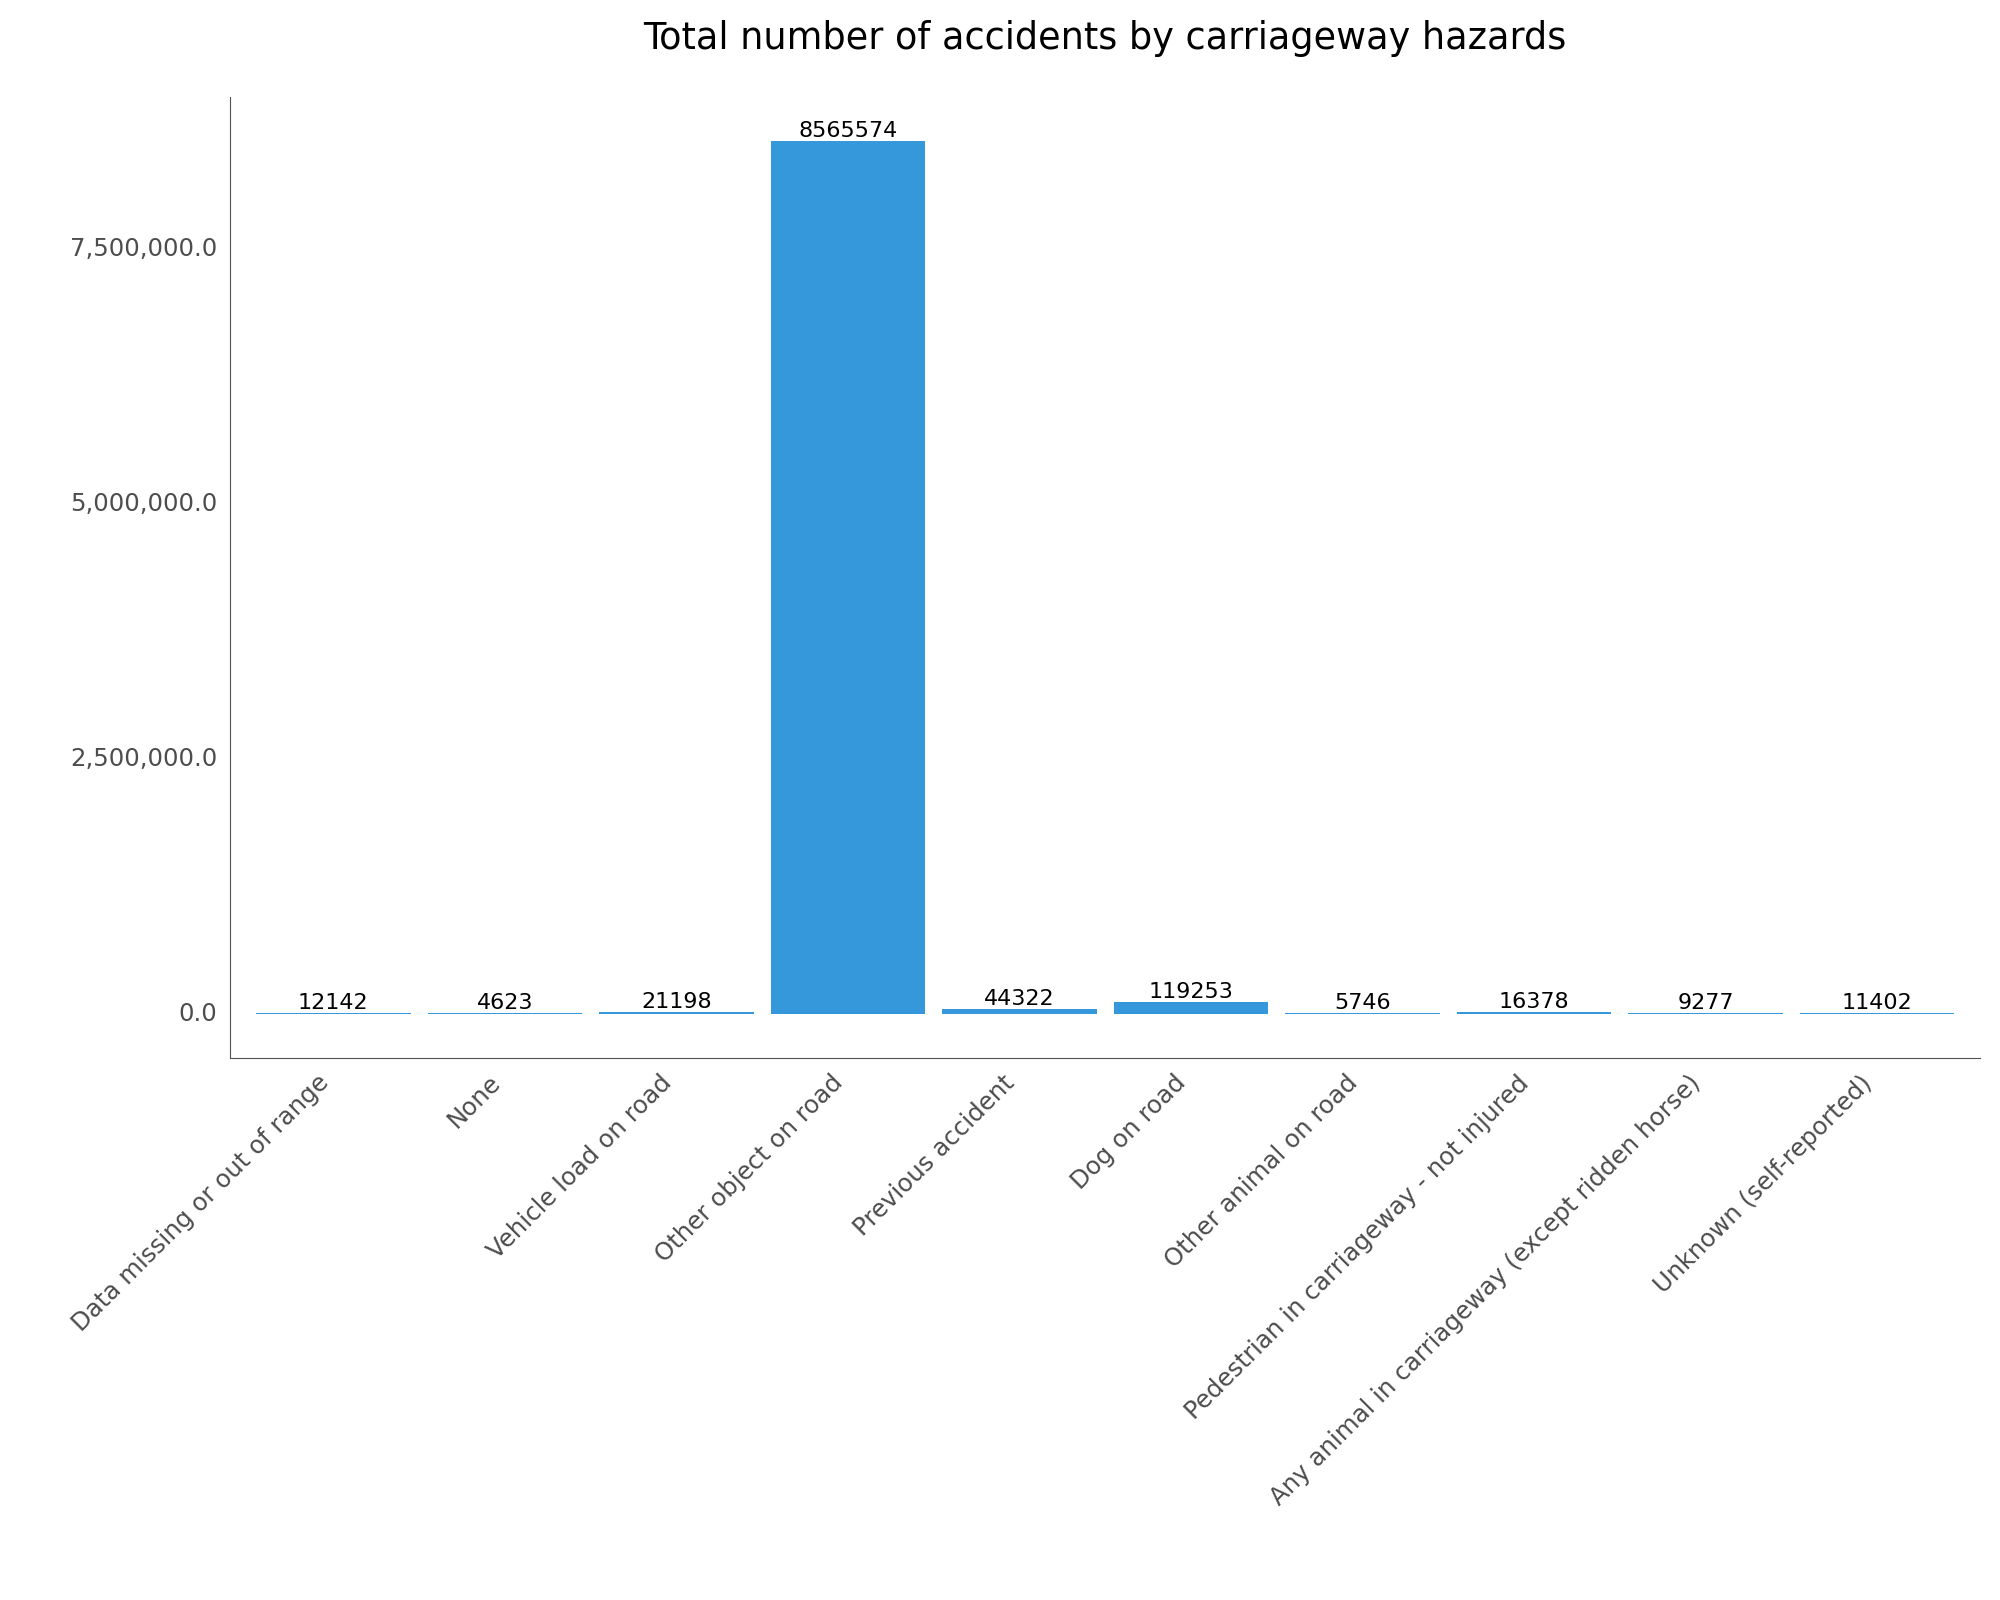

In [18]:
### Total accidents by carriageway hazards

acc_carriageway_hazards= df_collisions.groupby('carriageway_hazards')['accident_index'].count()
df_carriageway_hazards= pd.DataFrame({'carriageway_hazards': acc_carriageway_hazards.index, 'accident_count': acc_carriageway_hazards.values})

carriageway_hazards_names = {
    0: 'None',
    1: 'Vehicle load on road',
    2: 'Other object on road',
    3: 'Previous accident',
    4: 'Dog on road',
    5: 'Other animal on road',
    6: 'Pedestrian in carriageway - not injured',
    7: 'Any animal in carriageway (except ridden horse)',
    9: 'Unknown (self-reported)',
   -1: 'Data missing or out of range',
}


df_carriageway_hazards['carriageway_hazards_names'] = df_carriageway_hazards['carriageway_hazards'].map(carriageway_hazards_names)

plot = (
    ggplot(df_carriageway_hazards, aes(x='factor(carriageway_hazards_names)', y='accident_count')) +  
    geom_bar(stat='identity', fill='#3498db') +
    geom_text(aes(label='accident_count'), va='bottom', size=8, nudge_y=500) +
    labs(title='Total number of accidents by carriageway hazards', x='carriageway_hazards_names') +
    theme_minimal() +
    theme(
        axis_line_x=element_line(size=0.4, colour="#525252"),
        axis_line_y=element_line(size=0.4, colour="#525252"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(hjust=0.5),
        axis_title_x=element_text(color="white"),
        axis_title_y=element_text(color="white"),
        figure_size=(10, 8)
    ) +
    scale_x_discrete(labels=list(df_carriageway_hazards['carriageway_hazards_names'])) + 
    scale_y_continuous(labels=lambda x: ["{:,}".format(label) for label in x])
)

print(plot)